# Hbond Network

In [1]:
import networkx as nx
import mdtraj as md
import pandas as pd
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.hbonds as hbonds
import matplotlib
import matplotlib.pyplot as plt
import ast
import csv
import itertools
import warnings
warnings.filterwarnings('ignore')

In [2]:
traj_notess = [['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3'],['5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3'],['5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3'],['5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3'],['5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3'],['5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3'],['5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3'],['5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3'],['4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3'],['4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3'],['4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3'],['4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3'],['4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7'],['4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5'],['4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5'],['4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']]

In [53]:
traj_notes = ['5NJY_pH70_md1','5NJY_pH70_md2','5NJY_pH70_md3','5NJY_F238L_pH70_md1',
                 '5NJY_F238L_pH70_md2','5NJY_F238L_pH70_md3','5NJY_I233T_pH70_md4',
                  '5NJY_I233T_pH70_md2','5NJY_I233T_pH70_md3','5NJY_F238LI233T_pH70_md1',
                  '5NJY_F238LI233T_pH70_md2','5NJY_F238LI233T_pH70_md3','5NJY_pH46_md1','5NJY_pH46_md2','5NJY_pH46_md3','5NJY_F238L_pH46_md1',
                 '5NJY_F238L_pH46_md2','5NJY_F238L_pH46_md3','5NJY_I233T_pH46_md1',
                  '5NJY_I233T_pH46_md2','5NJY_I233T_pH46_md3','5NJY_F238LI233T_pH46_md1',
                  '5NJY_F238LI233T_pH46_md2','5NJY_F238LI233T_pH46_md3','4HFI_pH46_md1','4HFI_pH46_md2','4HFI_pH46_md3','4HFI_F238L_pH46_md1',
                 '4HFI_F238L_pH46_md2','4HFI_F238L_pH46_md3','4HFI_I233T_pH46_md1',
                  '4HFI_I233T_pH46_md2','4HFI_I233T_pH46_md3','4HFI_F238LI233T_pH46_md1',
                  '4HFI_F238LI233T_pH46_md2','4HFI_F238LI233T_pH46_md3','4NPQ_pH70_md5','4NPQ_pH70_md6','4NPQ_pH70_md7','4NPQ_F238L_pH70_md3',
                 '4NPQ_F238L_pH70_md4','4NPQ_F238L_pH70_md5','4NPQ_I233T_pH70_md3',
                  '4NPQ_I233T_pH70_md4','4NPQ_I233T_pH70_md5','4NPQ_F238LI233T_pH70_md3',
                  '4NPQ_F238LI233T_pH70_md4','4NPQ_F238LI233T_pH70_md5']

In [4]:
def gather_replicates(traj_notes,location = '/media/scottzhuang/data/MD/'):
    pearson_avg = []
    for traj_note in traj_notes:
        contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_2.csv')
        pearson_avg.append(contact_map['hbond'].values)
    contact_map['hbond'] = np.mean(pearson_avg,axis=0)
    return contact_map

In [5]:
def plot_hbond_map(data,ax,note):
    data[data.hbond >= 0.5].plot(kind='scatter',x='residue1',y='residue2',c='hbond',colormap='autumn',ax=ax)
    ax.set_title(note + ' Hbond & Water Bridge Map (lifetime > 0.5)')
    plt.show()

In [6]:
def plot_intra_hbond_map(data,note,ax):
    data1 = data[(data.residue1 <= 311) & (data.residue2 <= 311)]
    data2 = data[(data.residue1 > 311) & (data.residue1 <= 311 *2) &(data.residue2 > 311) & (data.residue2 <= 311 *2)]
    data3 = data[(data.residue1 > 311 *2) & (data.residue1 <= 311 *3) &(data.residue2 > 311 *2) & (data.residue2 <= 311 *3)]
    data4 = data[(data.residue1 > 311 *3) & (data.residue1 <= 311 *4) &(data.residue2 > 311 *3) & (data.residue2 <= 311 *4)]
    data5 = data[(data.residue1 > 311 *4) & (data.residue1 <= 311 *5) &(data.residue2 > 311 *4) & (data.residue2 <= 311 *5)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['hbond'] >= 0.1].reset_index()
    data2 = data2[data2['hbond'] >= 0.1].reset_index()
    data3 = data3[data3['hbond'] >= 0.1].reset_index()
    data4 = data4[data4['hbond'] >= 0.1].reset_index()
    data5 = data5[data5['hbond'] >= 0.1].reset_index()
    data_intra = pd.DataFrame(columns=['residue1','residue2','hbond'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5])[['residue1','residue2']].values]))):
        data_intra = pd.concat([data_intra,pd.DataFrame([[int(pair[0]) + 5,int(pair[1]) + 5,
#                           np.mean([data1[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1])]['hbond'].values,
#                                   data2[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1])]['hbond'].values,
#                                   data3[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1])]['hbond'].values,
#                                   data4[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1])]['hbond'].values,
#                                   data5[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1])]['hbond'].values])]],
                            np.sum(np.sum([data1.loc[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data2.loc[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data3.loc[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data4.loc[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data5.loc[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1]),'hbond'].values.tolist()]))/5]], 
                                                          columns=['residue1','residue2','hbond']
                                  )],ignore_index=True)
    data_intra = data_intra.convert_objects(convert_numeric=True)
    data_intra.plot(kind='scatter',x='residue1',y='residue2',c=data_intra.hbond,colormap='Greens',ax=ax,colorbar=False,vmax=1,vmin=0)
    ax.set_xlim(198,315)
    ax.set_ylim(198,315)
    data_intra.to_csv('conan_interaction/' + note + '_intra_hbond_new_2.csv')

In [7]:
def plot_inter_hbond_map(data,note,ax):
    data1 = data[(data.residue1 > 311 * 0) & (data.residue1 <= 311 * 1) &(data.residue2 > 311 * 1) & (data.residue2 <= 311 *2)]
    data2 = data[(data.residue1 > 311 * 1) & (data.residue1 <= 311 * 2) &(data.residue2 > 311 * 2) & (data.residue2 <= 311 *3)]
    data3 = data[(data.residue1 > 311 * 2) & (data.residue1 <= 311 * 3) &(data.residue2 > 311 * 3) & (data.residue2 <= 311 *4)]
    data4 = data[(data.residue1 > 311 * 3) & (data.residue1 <= 311 * 4) &(data.residue2 > 311 * 4) & (data.residue2 <= 311 *5)]
    data5 = data[(data.residue1 > 311 * 4) & (data.residue1 <= 311 * 5) &(data.residue2 > 311 * 0) & (data.residue2 <= 311 * 1)]
    data2.residue1 = data1.residue1.values
    data2.residue2 = data1.residue2.values
    data3.residue1 = data1.residue1.values
    data3.residue2 = data1.residue2.values   
    data4.residue1 = data1.residue1.values
    data4.residue2 = data1.residue2.values   
    data5.residue1 = data1.residue1.values
    data5.residue2 = data1.residue2.values   
    data1 = data1[data1['hbond'] >= 0.1].reset_index()
    data2 = data2[data2['hbond'] >= 0.1].reset_index()
    data3 = data3[data3['hbond'] >= 0.1].reset_index()
    data4 = data4[data4['hbond'] >= 0.1].reset_index()
    data5 = data5[data5['hbond'] >= 0.1].reset_index()
    data_inter = pd.DataFrame(columns=['residue1','residue2','hbond'])
    for pair in np.array(list(set([tuple(t) for t in pd.concat([data1,data2,data3,data4,data5])[['residue1','residue2']].values]))):
                            
        data_inter = pd.concat([data_inter,pd.DataFrame([[int(pair[0]) + 5,int(pair[1]-311) + 5,
                                                        np.sum(np.sum([data1.loc[(data1.residue1 == pair[0]) & (data1.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data2.loc[(data2.residue1 == pair[0]) & (data2.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data3.loc[(data3.residue1 == pair[0]) & (data3.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data4.loc[(data4.residue1 == pair[0]) & (data4.residue2 == pair[1]),'hbond'].values.tolist(),
                                                                data5.loc[(data5.residue1 == pair[0]) & (data5.residue2 == pair[1]),'hbond'].values.tolist()]))/5 
                                                         ]]
                                                        ,columns=['residue1','residue2','hbond'])
                                                         ],ignore_index=True)
    data_inter = data_inter.convert_objects(convert_numeric=True)
    data_inter.plot(kind='scatter',x='residue1',y='residue2',c='hbond',colormap='Greens',ax=ax,colorbar=True,vmax=1,vmin=0)
    ax.set_xlim(198,315)
    ax.set_ylim(198,315)
    data_inter.to_csv('conan_interaction/' + note + '_inter_hbond_new_2.csv')

In [8]:
def plot_inter_intra_hbond(traj_notes):
    fig = plt.figure() 
    ax1 = fig.add_subplot(1,2,1,aspect='equal') 
    ax2 = fig.add_subplot(1,2,2,aspect='equal') 
    plot_intra_hbond_map(gather_replicates(traj_notes),traj_notes[0][:-4],ax1)
    plot_inter_hbond_map(gather_replicates(traj_notes),traj_notes[0][:-4],ax2)
    plt.suptitle(traj_notes[0][:-4])
    plt.tight_layout()
    plt.show()

In [9]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(plot_inter_intra_hbond)(traj_notes) for traj_notes in traj_notess)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [10]:
def plot_interaction_difference(note1,note2,note3):
    fig = plt.figure(figsize=(20, 10)) 
    ax1 = fig.add_subplot(1,2,1,aspect='equal') 

    ax2 = fig.add_subplot(1,2,2,aspect='equal')

    #ax3 = fig.add_subplot(1,3,3) 
    plot_inter_interaction_difference(note1,note2,note3,ax1)
    plot_intra_interaction_difference(note1,note2,note3,ax2)
    #plt3 = plot_salt_bridge_interaction(data,ax3)

    ax1.set_xlim(198,315)
    ax1.set_ylim(198,315)
    ax2.set_xlim(198,315)
    ax2.set_ylim(198,315) 
    ax1.set_xticks(np.arange(200,320,10))
    ax1.set_yticks(np.arange(200,320,10))
    ax2.set_xticks(np.arange(200,320,10))
    ax2.set_yticks(np.arange(200,320,10))
    ax1.grid()
    ax2.grid()
    ax1.set_title('inter interaction')
    ax2.set_title('intra interaction')
    plt.suptitle(note1 + ' vs ' + note2 + ' of ' + note3)

    plt.tight_layout()
    plt.savefig('plots/' + note1 + '_' + note2 + 'diff.pdf')
    plt.show()

In [11]:
def plot_inter_interaction_difference(note1,note2,note3,ax):
    difference = 0.4

    interaction_dataframe1 = pd.read_csv('conan_interaction/' + note1 + '_inter_hbond_new_2.csv')
    interaction_dataframe2 = pd.read_csv('conan_interaction/' + note2 + '_inter_hbond_new_2.csv')
    for residues in (interaction_dataframe2[['residue1','residue2']].values):
        if not(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])].empty):
            interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'] = (interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])]['hbond'].values - interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'].values)[0]
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note1) + ' of ' + str(residues))
    for residues in (interaction_dataframe1[['residue1','residue2']].values):
        if interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])].empty:
            interaction_dataframe1.loc[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1]),'hbond'] = - (interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'])
            interaction_dataframe2 = interaction_dataframe2.append(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])],ignore_index = True)
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('inter: ' + str(note1) + ' of ' + str(residues))
    interaction_dataframe2.plot(kind='scatter',x='residue1',y='residue2',c=interaction_dataframe2.hbond,colormap='PuOr',ax=ax,colorbar=False,vmin=-0.5, vmax=0.5)


In [12]:
def plot_intra_interaction_difference(note1,note2,note3,ax):
    difference = 0.4
    interaction_dataframe1 = pd.read_csv('conan_interaction/' + note1 + '_intra_hbond_new_2.csv')
    interaction_dataframe2 = pd.read_csv('conan_interaction/' + note2 + '_intra_hbond_new_2.csv')
    for residues in (interaction_dataframe2[['residue1','residue2']].values):
        if not(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])].empty):
            interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'] = (interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])]['hbond'].values - interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'].values)[0]
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note1) + ' of ' + str(residues))
    for residues in (interaction_dataframe1[['residue1','residue2']].values):
        if interaction_dataframe2[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1])].empty:
            interaction_dataframe1.loc[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1]),'hbond'] = - (interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])]['hbond'])
            interaction_dataframe2 = interaction_dataframe2.append(interaction_dataframe1[(interaction_dataframe1['residue1'] == residues[0]) & (interaction_dataframe1['residue2'] == residues[1])],ignore_index = True)
        if ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) >= difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note2) + ' of ' + str(residues))
        elif ((interaction_dataframe2.loc[(interaction_dataframe2['residue1'] == residues[0]) & (interaction_dataframe2['residue2'] == residues[1]),'hbond'].values) <= -difference) & (residues[0] > 150) & (residues[1] > 150):
            print('intra: ' + str(note1) + ' of ' + str(residues))

    interaction_dataframe2.plot(kind='scatter',x='residue1',y='residue2',c=interaction_dataframe2.hbond,colormap='PuOr',ax=ax,colorbar=False,vmin=-0.5, vmax=0.5)


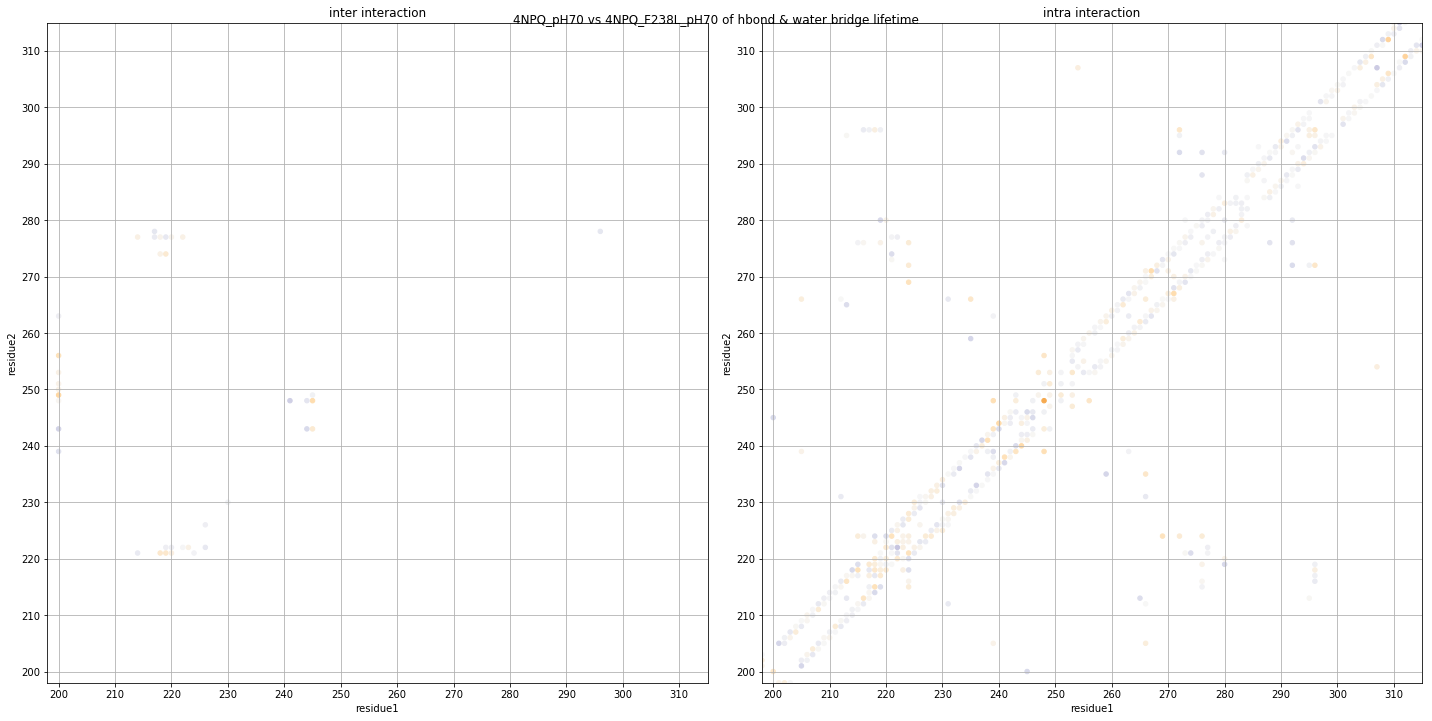

In [13]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238L_pH70','hbond & water bridge lifetime')

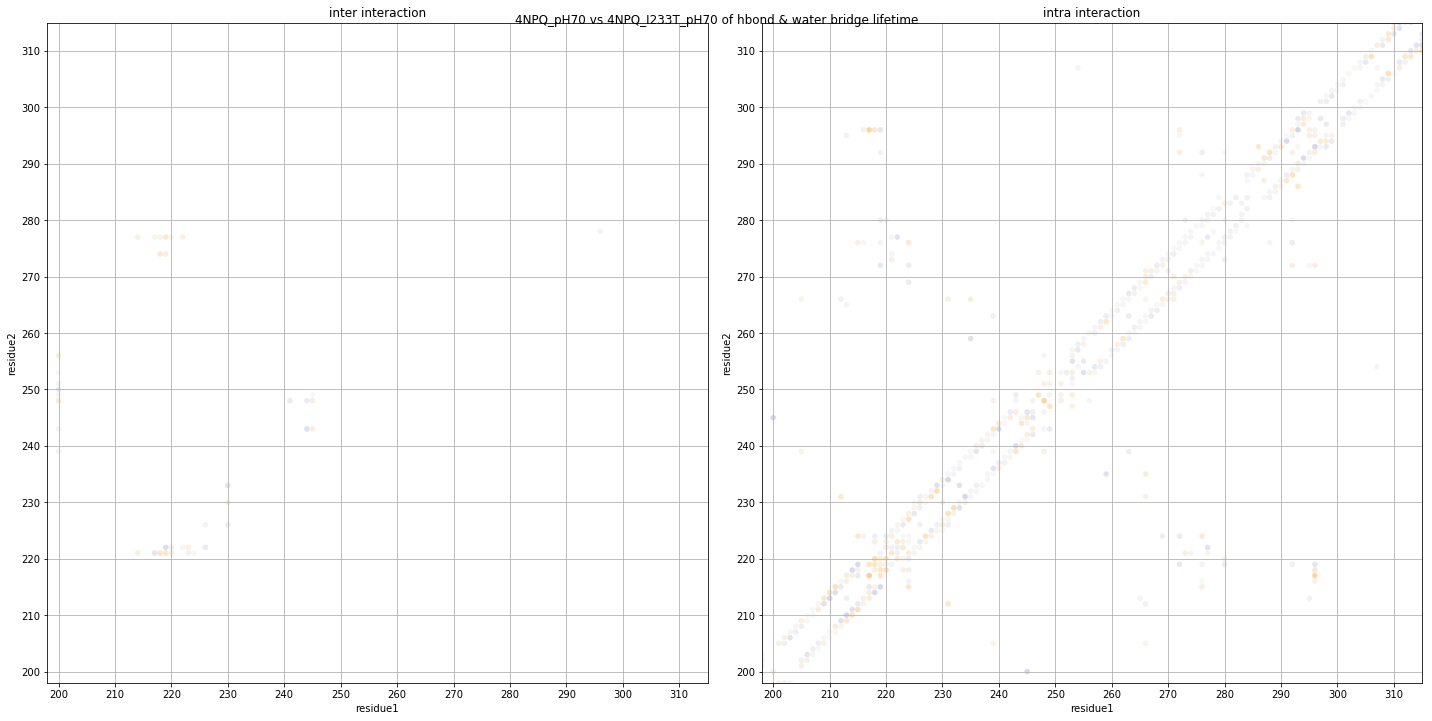

In [14]:
plot_interaction_difference('4NPQ_pH70','4NPQ_I233T_pH70','hbond & water bridge lifetime')

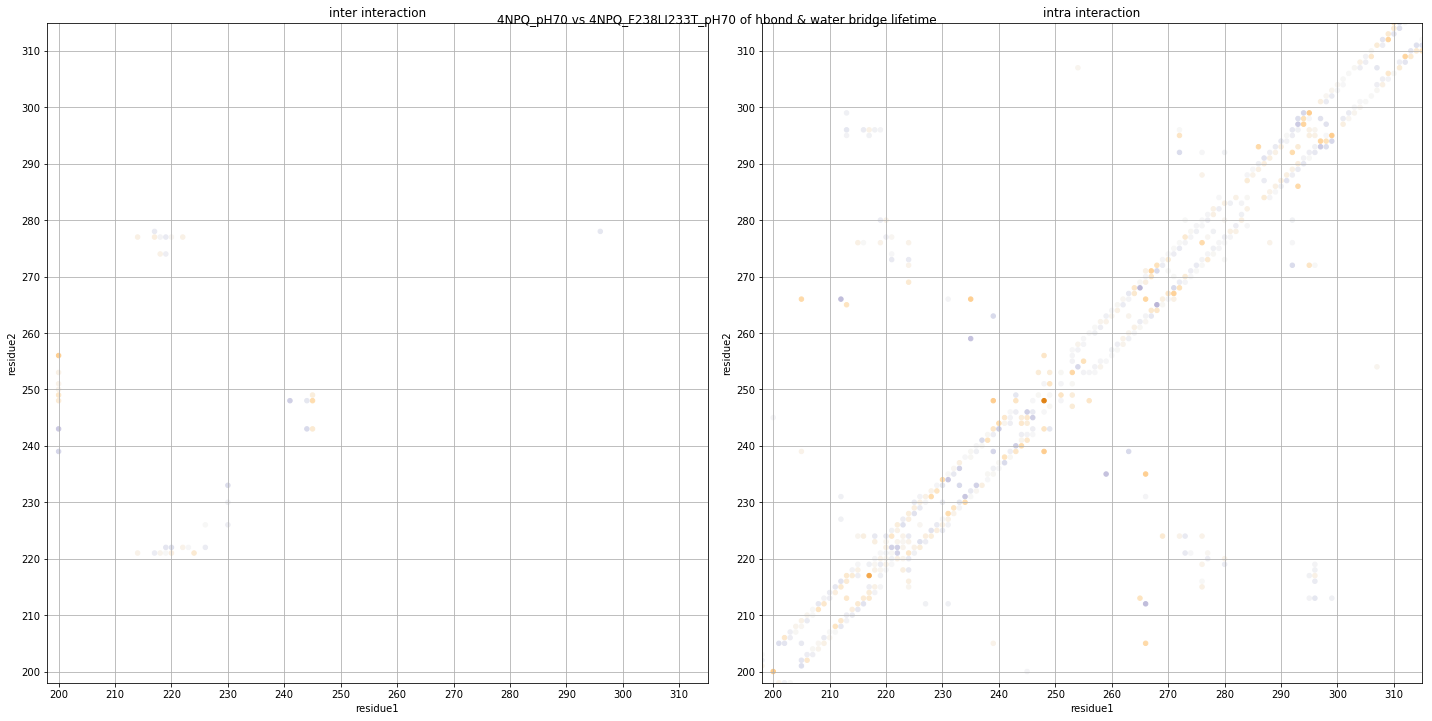

In [15]:
plot_interaction_difference('4NPQ_pH70','4NPQ_F238LI233T_pH70','hbond & water bridge lifetime')

intra: 4HFI_pH46 of [237 241]
intra: 4HFI_pH46 of [241 237]
intra: 4HFI_F238L_pH46 of [237 233]
intra: 4HFI_F238L_pH46 of [233 237]
intra: 4HFI_pH46 of [237 241]
intra: 4HFI_pH46 of [241 237]
intra: 4HFI_F238L_pH46 of [237 233]
intra: 4HFI_F238L_pH46 of [233 237]


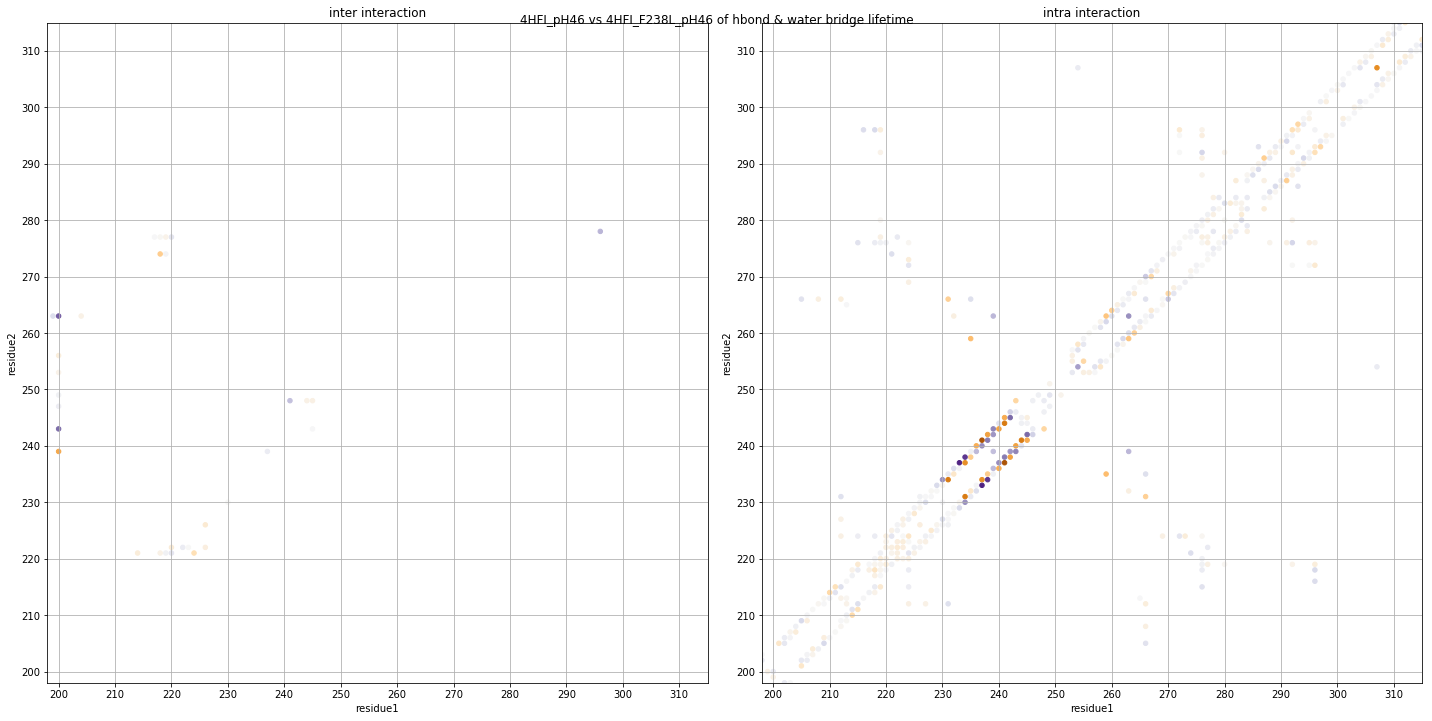

In [16]:
plot_interaction_difference('4HFI_pH46','4HFI_F238L_pH46','hbond & water bridge lifetime')

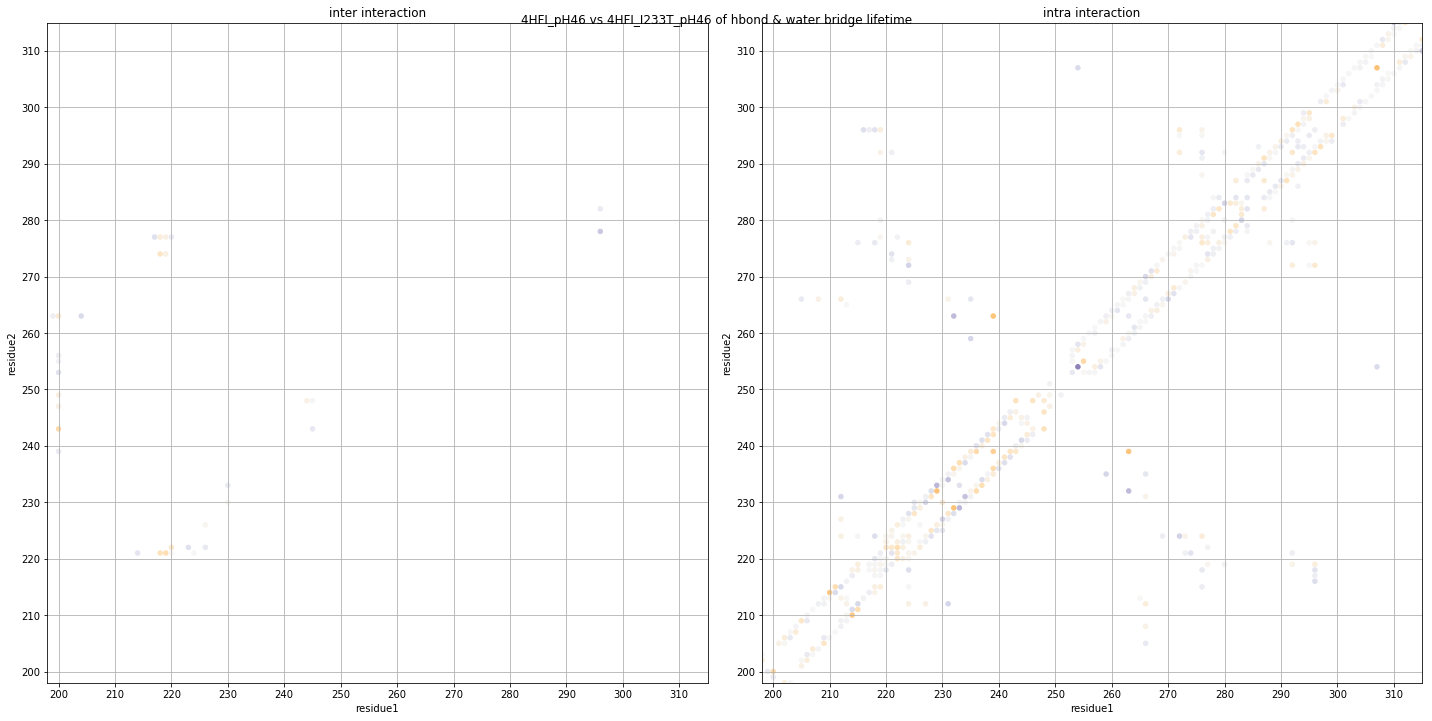

In [17]:
plot_interaction_difference('4HFI_pH46','4HFI_I233T_pH46','hbond & water bridge lifetime')

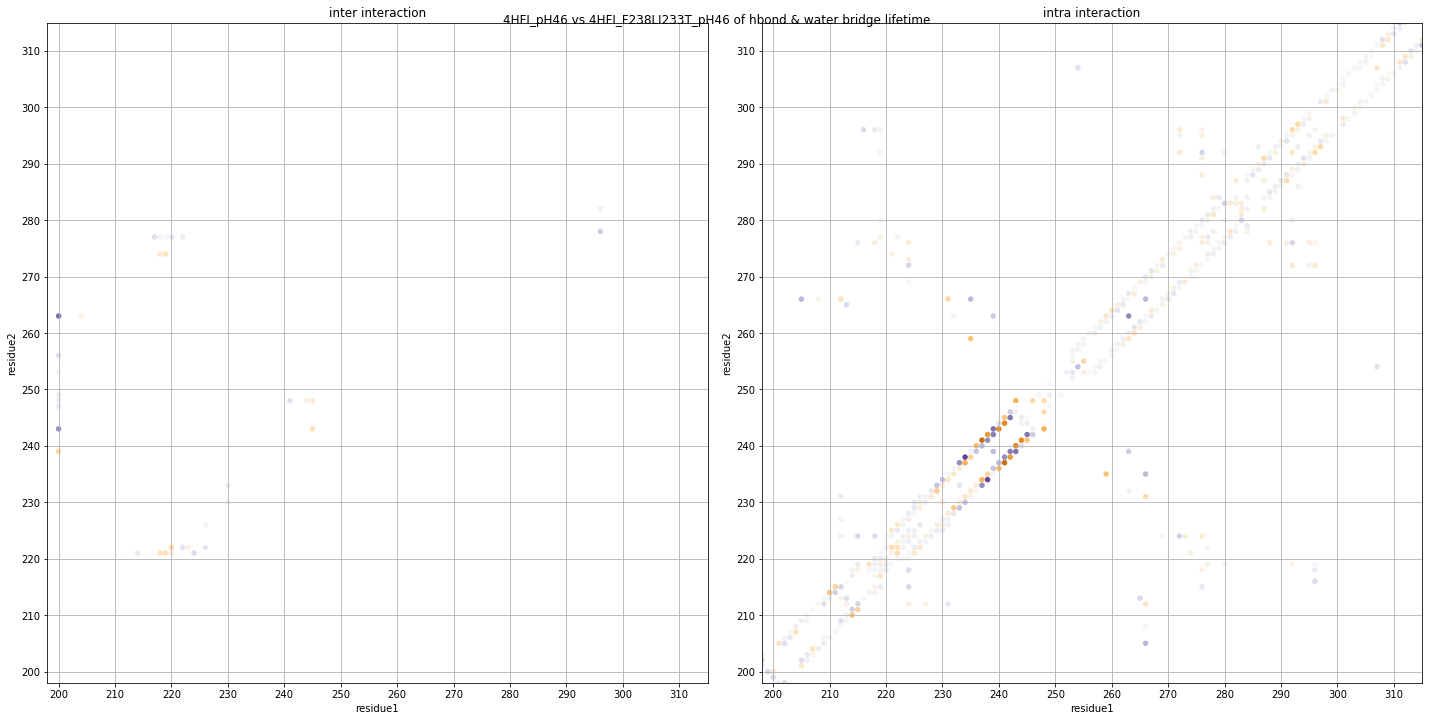

In [18]:
plot_interaction_difference('4HFI_pH46','4HFI_F238LI233T_pH46','hbond & water bridge lifetime')

intra: 5NJY_pH46 of [277 277]
intra: 5NJY_pH70 of [248 243]
intra: 5NJY_pH70 of [243 248]
intra: 5NJY_pH46 of [277 277]
intra: 5NJY_pH70 of [248 243]
intra: 5NJY_pH70 of [243 248]


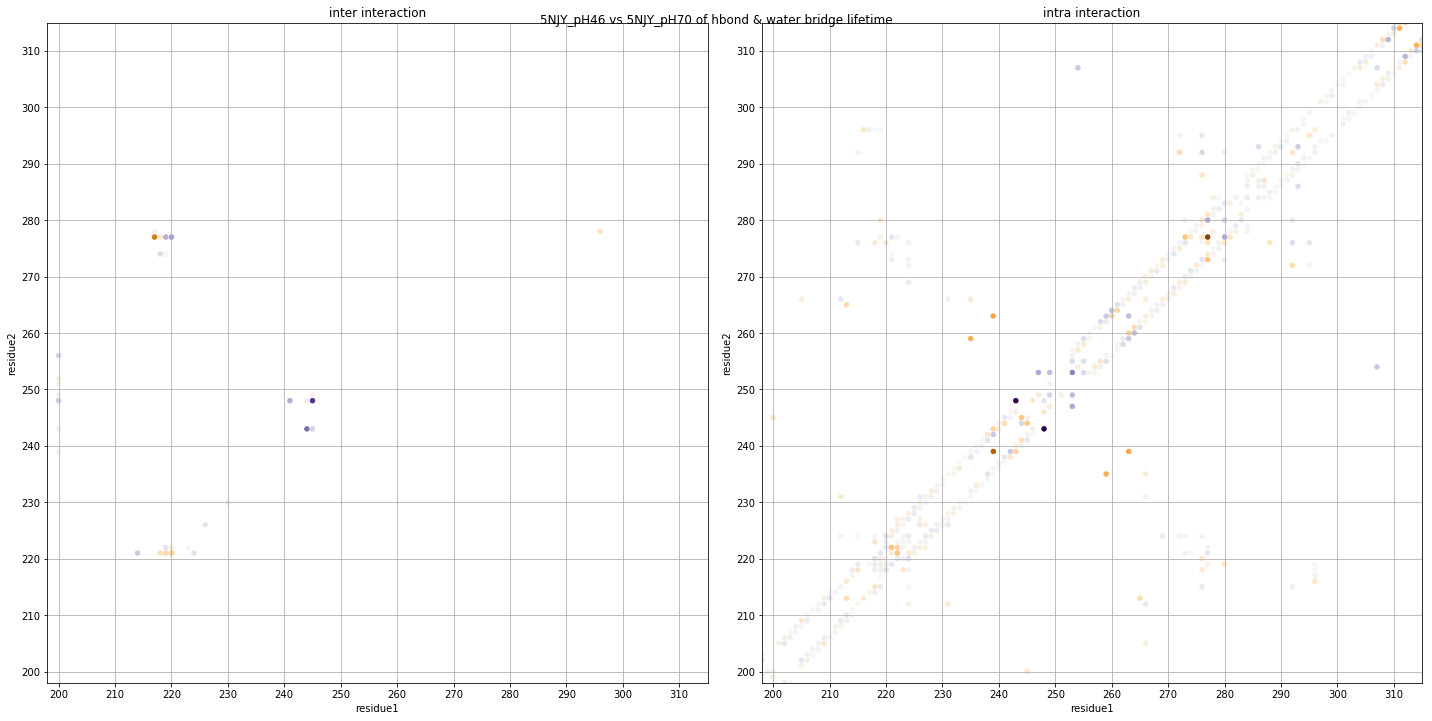

In [19]:
plot_interaction_difference('5NJY_pH46','5NJY_pH70','hbond & water bridge lifetime')

inter: 4NPQ_pH70 of [245 248]
inter: 4NPQ_pH70 of [245 248]
intra: 5NJY_pH46 of [266 266]
intra: 5NJY_pH46 of [235 266]
intra: 4NPQ_pH70 of [266 212]
intra: 5NJY_pH46 of [266 205]
intra: 5NJY_pH46 of [277 277]
intra: 5NJY_pH46 of [265 213]
intra: 5NJY_pH46 of [205 266]
intra: 5NJY_pH46 of [213 265]
intra: 4NPQ_pH70 of [212 266]
intra: 4NPQ_pH70 of [248 243]
intra: 5NJY_pH46 of [266 235]
intra: 4NPQ_pH70 of [296 217]
intra: 5NJY_pH46 of [213 213]
intra: 4NPQ_pH70 of [243 248]
intra: 4NPQ_pH70 of [217 296]
intra: 4NPQ_pH70 of [217 217]
intra: 5NJY_pH46 of [266 266]
intra: 5NJY_pH46 of [235 266]
intra: 4NPQ_pH70 of [266 212]
intra: 5NJY_pH46 of [266 205]
intra: 5NJY_pH46 of [277 277]
intra: 5NJY_pH46 of [265 213]
intra: 5NJY_pH46 of [205 266]
intra: 5NJY_pH46 of [213 265]
intra: 4NPQ_pH70 of [212 266]
intra: 4NPQ_pH70 of [248 243]
intra: 5NJY_pH46 of [266 235]
intra: 5NJY_pH46 of [213 213]
intra: 4NPQ_pH70 of [243 248]


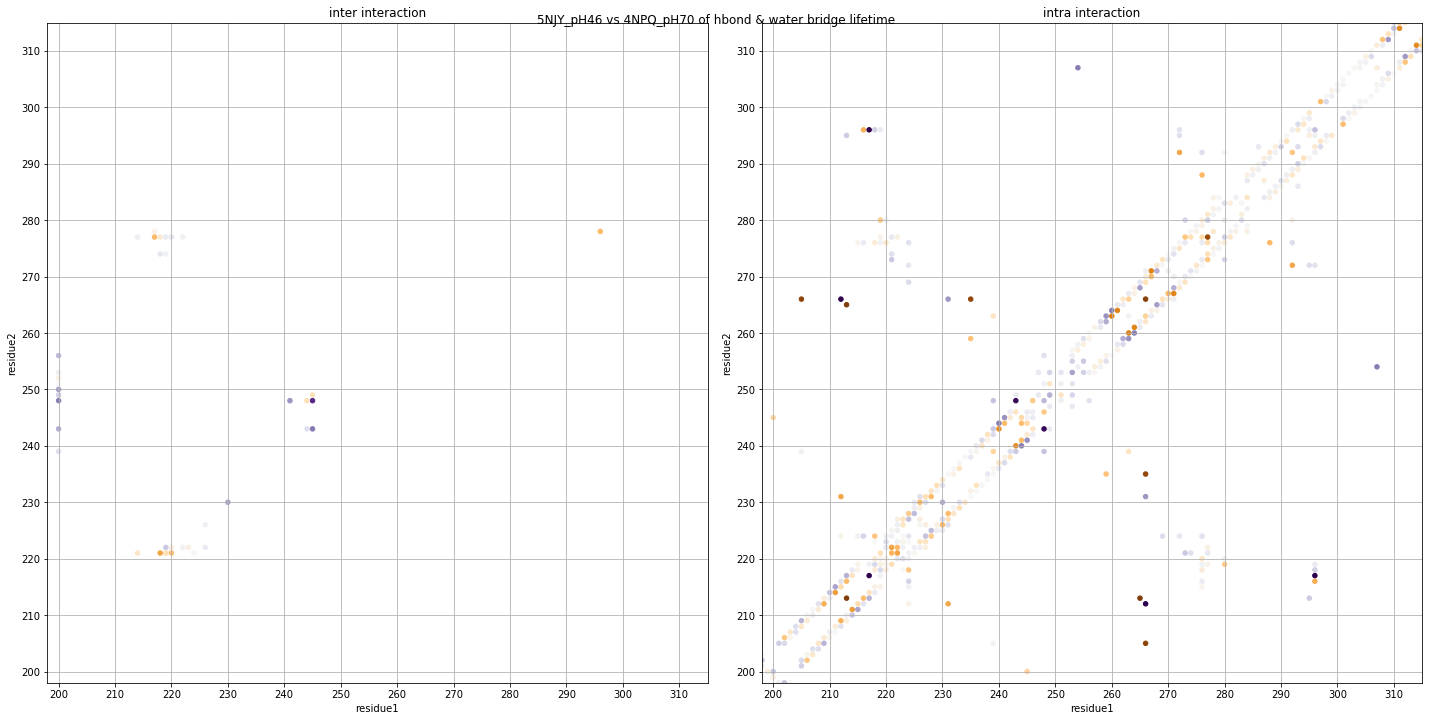

In [20]:
plot_interaction_difference('5NJY_pH46','4NPQ_pH70','hbond & water bridge lifetime')

inter: 4HFI_pH46 of [200 239]
inter: 4HFI_pH46 of [200 239]
intra: 4NPQ_pH70 of [266 212]
intra: 4NPQ_pH70 of [234 238]
intra: 4HFI_pH46 of [277 277]
intra: 4HFI_pH46 of [265 213]
intra: 4NPQ_pH70 of [237 233]
intra: 4HFI_pH46 of [213 265]
intra: 4NPQ_pH70 of [233 237]
intra: 4NPQ_pH70 of [212 266]
intra: 4HFI_pH46 of [235 259]
intra: 4NPQ_pH70 of [239 263]
intra: 4NPQ_pH70 of [296 217]
intra: 4HFI_pH46 of [213 213]
intra: 4NPQ_pH70 of [217 296]
intra: 4NPQ_pH70 of [263 239]
intra: 4NPQ_pH70 of [238 234]
intra: 4NPQ_pH70 of [217 217]
intra: 4HFI_pH46 of [259 235]
intra: 4HFI_pH46 of [237 234]
intra: 4HFI_pH46 of [234 231]
intra: 4NPQ_pH70 of [266 212]
intra: 4NPQ_pH70 of [234 238]
intra: 4HFI_pH46 of [277 277]
intra: 4HFI_pH46 of [265 213]
intra: 4NPQ_pH70 of [237 233]
intra: 4HFI_pH46 of [213 265]
intra: 4NPQ_pH70 of [233 237]
intra: 4NPQ_pH70 of [212 266]
intra: 4HFI_pH46 of [235 259]
intra: 4NPQ_pH70 of [239 263]
intra: 4HFI_pH46 of [234 237]
intra: 4HFI_pH46 of [213 213]
intra: 4NP

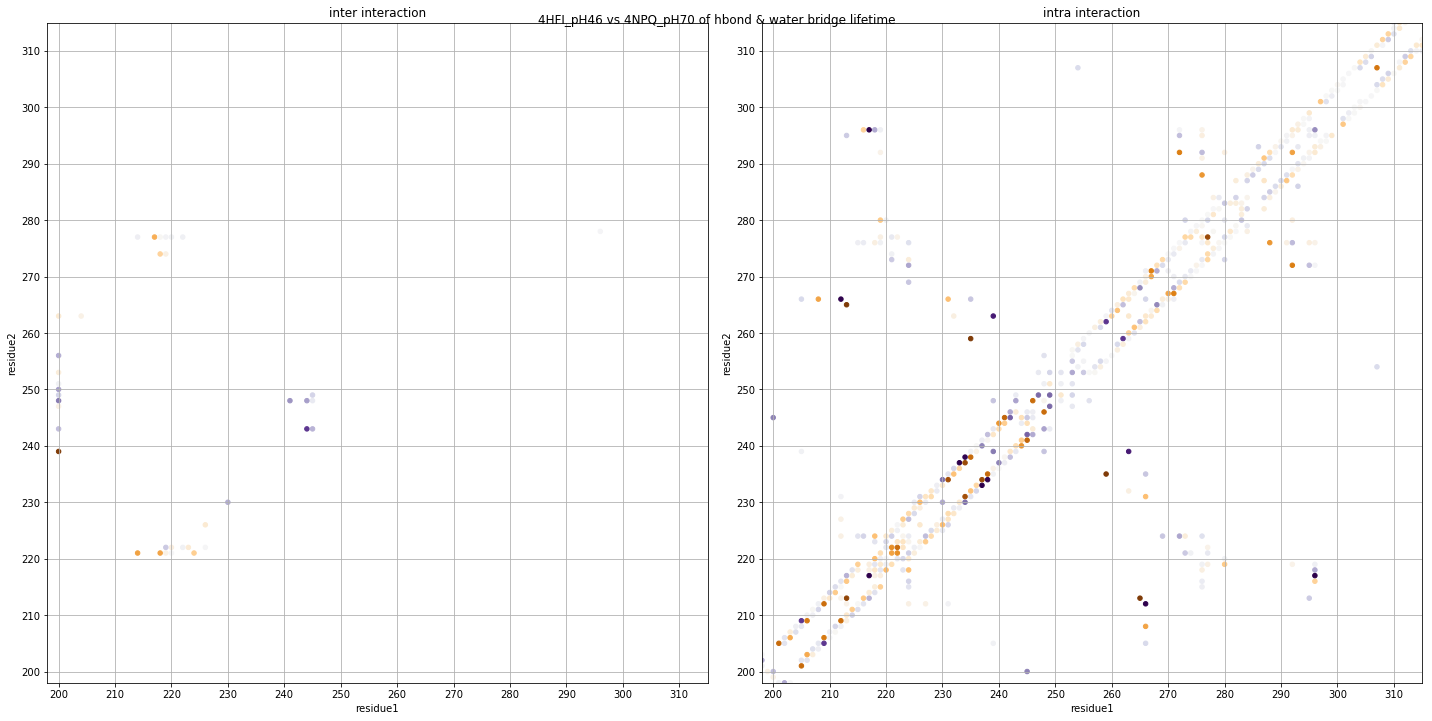

In [21]:
plot_interaction_difference('4HFI_pH46','4NPQ_pH70','hbond & water bridge lifetime')

inter: 4HFI_F238L_pH46 of [200 239]
inter: 4NPQ_F238L_pH70 of [244 243]
inter: 4HFI_F238L_pH46 of [200 239]
intra: 4HFI_F238L_pH46 of [267 271]
intra: 4NPQ_F238L_pH70 of [237 241]
intra: 4NPQ_F238L_pH70 of [241 237]
intra: 4NPQ_F238L_pH70 of [266 212]
intra: 4HFI_F238L_pH46 of [277 277]
intra: 4HFI_F238L_pH46 of [265 213]
intra: 4HFI_F238L_pH46 of [244 240]
intra: 4HFI_F238L_pH46 of [213 265]
intra: 4NPQ_F238L_pH70 of [212 266]
intra: 4NPQ_F238L_pH70 of [296 217]
intra: 4HFI_F238L_pH46 of [213 213]
intra: 4NPQ_F238L_pH70 of [217 296]
intra: 4HFI_F238L_pH46 of [240 244]
intra: 4HFI_F238L_pH46 of [271 267]
intra: 4NPQ_F238L_pH70 of [217 217]
intra: 4HFI_F238L_pH46 of [267 271]
intra: 4NPQ_F238L_pH70 of [237 241]
intra: 4NPQ_F238L_pH70 of [241 237]
intra: 4NPQ_F238L_pH70 of [266 212]
intra: 4HFI_F238L_pH46 of [277 277]
intra: 4HFI_F238L_pH46 of [265 213]
intra: 4HFI_F238L_pH46 of [244 240]
intra: 4HFI_F238L_pH46 of [213 265]
intra: 4NPQ_F238L_pH70 of [212 266]
intra: 4HFI_F238L_pH46 of [2

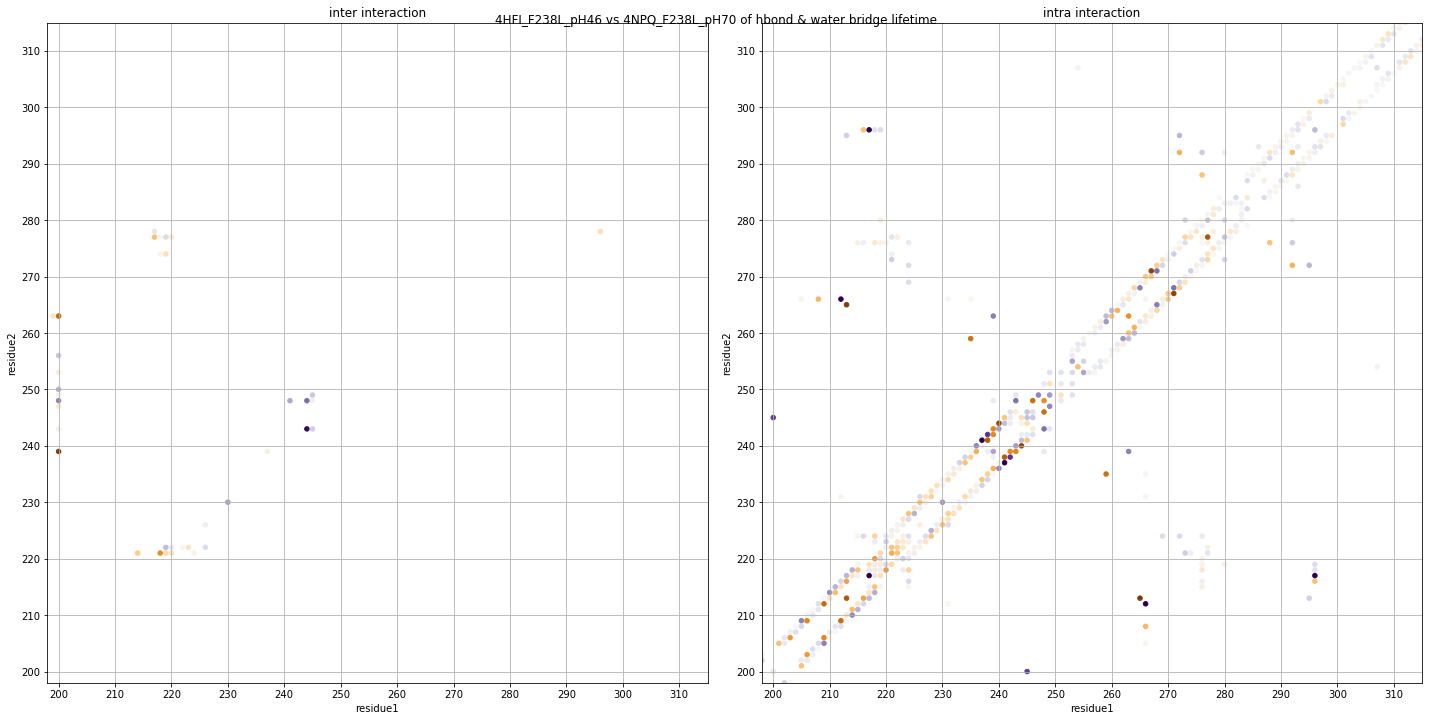

In [22]:
plot_interaction_difference('4HFI_F238L_pH46','4NPQ_F238L_pH70','hbond & water bridge lifetime')

inter: 4HFI_I233T_pH46 of [200 239]
inter: 4NPQ_I233T_pH70 of [244 243]
inter: 4HFI_I233T_pH46 of [200 239]
intra: 4HFI_I233T_pH46 of [234 231]
intra: 4NPQ_I233T_pH70 of [266 212]
intra: 4NPQ_I233T_pH70 of [234 238]
intra: 4HFI_I233T_pH46 of [277 277]
intra: 4HFI_I233T_pH46 of [265 213]
intra: 4NPQ_I233T_pH70 of [237 233]
intra: 4HFI_I233T_pH46 of [213 265]
intra: 4HFI_I233T_pH46 of [241 245]
intra: 4NPQ_I233T_pH70 of [233 237]
intra: 4NPQ_I233T_pH70 of [205 209]
intra: 4NPQ_I233T_pH70 of [209 205]
intra: 4NPQ_I233T_pH70 of [212 266]
intra: 4HFI_I233T_pH46 of [235 259]
intra: 4HFI_I233T_pH46 of [245 241]
intra: 4NPQ_I233T_pH70 of [239 263]
intra: 4NPQ_I233T_pH70 of [296 217]
intra: 4HFI_I233T_pH46 of [213 213]
intra: 4NPQ_I233T_pH70 of [217 296]
intra: 4NPQ_I233T_pH70 of [263 239]
intra: 4NPQ_I233T_pH70 of [238 234]
intra: 4NPQ_I233T_pH70 of [217 217]
intra: 4HFI_I233T_pH46 of [259 235]
intra: 4HFI_I233T_pH46 of [231 234]
intra: 4NPQ_I233T_pH70 of [239 239]
intra: 4HFI_I233T_pH46 of [2

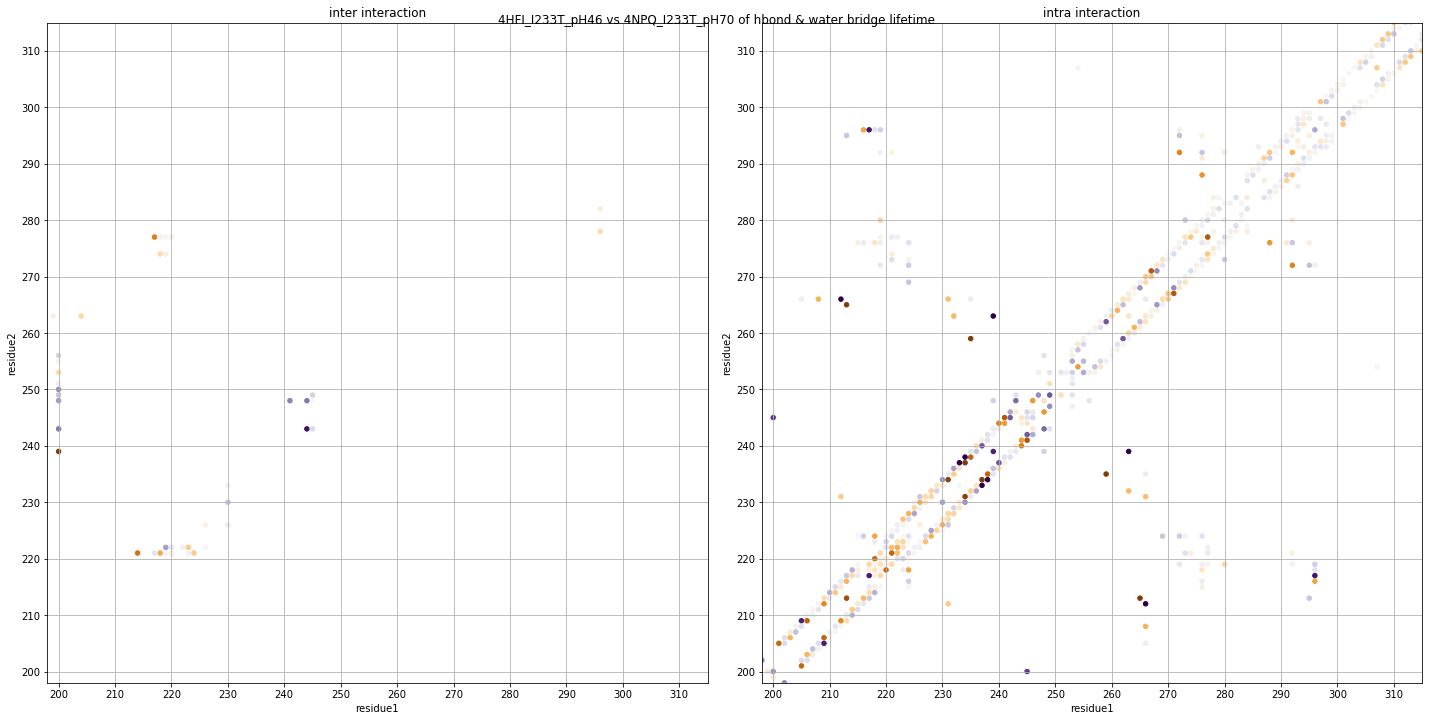

In [23]:
plot_interaction_difference('4HFI_I233T_pH46','4NPQ_I233T_pH70','hbond & water bridge lifetime')

inter: 4HFI_F238LI233T_pH46 of [200 239]
inter: 4NPQ_F238LI233T_pH70 of [244 243]
inter: 4HFI_F238LI233T_pH46 of [200 239]
intra: 4HFI_F238LI233T_pH46 of [267 271]
intra: 4NPQ_F238LI233T_pH70 of [237 241]
intra: 4NPQ_F238LI233T_pH70 of [241 237]
intra: 4NPQ_F238LI233T_pH70 of [266 212]
intra: 4HFI_F238LI233T_pH46 of [277 277]
intra: 4HFI_F238LI233T_pH46 of [265 213]
intra: 4HFI_F238LI233T_pH46 of [244 240]
intra: 4NPQ_F238LI233T_pH70 of [265 268]
intra: 4HFI_F238LI233T_pH46 of [213 265]
intra: 4NPQ_F238LI233T_pH70 of [212 266]
intra: 4NPQ_F238LI233T_pH70 of [238 242]
intra: 4NPQ_F238LI233T_pH70 of [242 238]
intra: 4NPQ_F238LI233T_pH70 of [268 265]
intra: 4HFI_F238LI233T_pH46 of [212 209]
intra: 4NPQ_F238LI233T_pH70 of [239 263]
intra: 4NPQ_F238LI233T_pH70 of [296 217]
intra: 4HFI_F238LI233T_pH46 of [213 213]
intra: 4NPQ_F238LI233T_pH70 of [217 296]
intra: 4HFI_F238LI233T_pH46 of [240 244]
intra: 4HFI_F238LI233T_pH46 of [209 212]
intra: 4NPQ_F238LI233T_pH70 of [263 239]
intra: 4HFI_F238

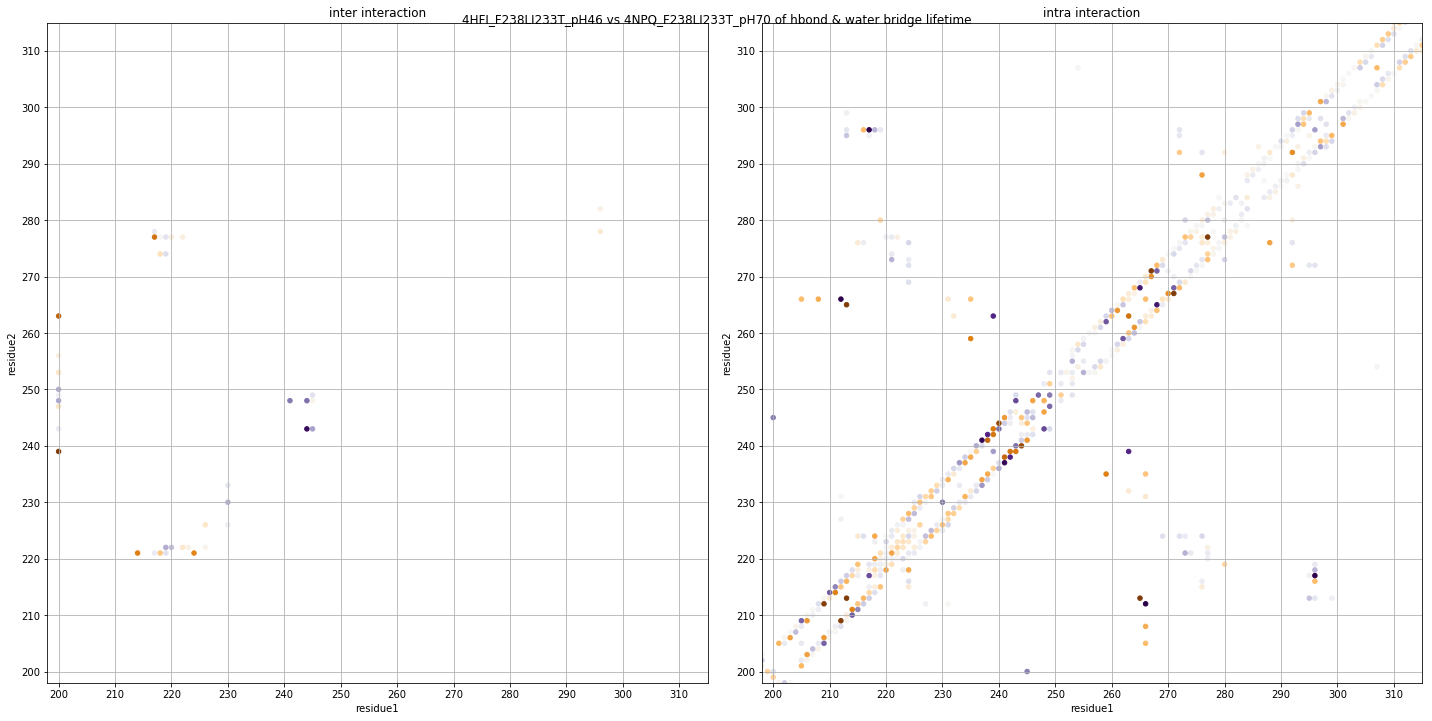

In [24]:
plot_interaction_difference('4HFI_F238LI233T_pH46','4NPQ_F238LI233T_pH70','hbond & water bridge lifetime')

In [245]:
# Build a decision function by interaction differernce of open and closed states

In [60]:
hbond_4NPQ_WT_list_inter_pair = pd.read_csv('conan_interaction/' + '4NPQ_pH70' + '_inter_hbond_new.csv')[['residue1','residue2']].values
hbond_4NPQ_WT_list_intra_pair = pd.read_csv('conan_interaction/' + '4NPQ_pH70' + '_intra_hbond_new.csv')[['residue1','residue2']].values

hbond_5NJY_WT_list_inter_pair = pd.read_csv('conan_interaction/' + '4NPQ_pH70' + '_inter_hbond_new.csv')[['residue1','residue2']].values
hbond_5NJY_WT_list_intra_pair = pd.read_csv('conan_interaction/' + '4NPQ_pH70' + '_intra_hbond_new.csv')[['residue1','residue2']].values

# Hbond Network

In [25]:
trans_ind = np.asarray([np.arange(193,311),np.arange(504,622),np.arange(815,933),np.arange(1126,1244),np.arange(1437,1555)]).flatten()

In [26]:
# Helix coordinate
# Polar Coordinate to Cartesian Coordinate

In [27]:
r = [1,2,3]
theta2 = np.asarray([0,-1,-2,-3,-4]) * 2 * np.pi / 5
theta1 = theta2 - np.pi / 7
theta3 = theta2 + np.pi / 7
theta4 = np.asarray([0,-1,-2,-3,-4]) * 2 * np.pi / 5

In [28]:
h2 = np.asarray([r[0] * np.cos(theta2),r[0] * np.sin(theta2)]).T
h4 = np.asarray([r[2] * np.cos(theta4),r[2] * np.sin(theta4)]).T
h3 = np.asarray([r[1] * np.cos(theta3),r[1] * np.sin(theta3)]).T
h1 = np.asarray([r[1] * np.cos(theta1),r[1] * np.sin(theta1)]).T

In [29]:
helix_1_ind = [np.arange(198,220) + 311 * 0 - 5,np.arange(198,220) + 311 * 1 - 5,np.arange(198,220) + 311 * 2 - 5,np.arange(198,220) + 311 * 3 - 5,np.arange(198,220) + 311 * 4 - 5]
helix_2_ind = [np.arange(220,250) + 311 * 0 - 5,np.arange(220,250) + 311 * 1 - 5,np.arange(220,250) + 311 * 2 - 5,np.arange(220,250) + 311 * 3 - 5,np.arange(220,250) + 311 * 4 - 5]
helix_3_ind = [np.arange(250,282) + 311 * 0 - 5,np.arange(250,282) + 311 * 1 - 5,np.arange(250,282) + 311 * 2 - 5,np.arange(250,282) + 311 * 3 - 5,np.arange(250,282) + 311 * 4 - 5]
helix_4_ind = [np.arange(282,316) + 311 * 0 - 5,np.arange(282,316) + 311 * 1 - 5,np.arange(282,316) + 311 * 2 - 5,np.arange(282,316) + 311 * 3 - 5,np.arange(282,316) + 311 * 4 - 5]

In [30]:
helix_1_ind = [np.arange(195,218) + 311 * 0 - 5,np.arange(195,218) + 311 * 1 - 5,np.arange(195,218) + 311 * 2 - 5,np.arange(195,218) + 311 * 3 - 5,np.arange(195,218) + 311 * 4 - 5]
helix_2_ind = [np.arange(220,246) + 311 * 0 - 5,np.arange(220,246) + 311 * 1 - 5,np.arange(220,246) + 311 * 2 - 5,np.arange(220,246) + 311 * 3 - 5,np.arange(220,246) + 311 * 4 - 5]
helix_3_ind = [np.arange(252,283) + 311 * 0 - 5,np.arange(252,283) + 311 * 1 - 5,np.arange(252,283) + 311 * 2 - 5,np.arange(252,283) + 311 * 3 - 5,np.arange(252,283) + 311 * 4 - 5]
helix_4_ind = [np.arange(285,316) + 311 * 0 - 5,np.arange(285,316) + 311 * 1 - 5,np.arange(285,316) + 311 * 2 - 5,np.arange(285,316) + 311 * 3 - 5,np.arange(285,316) + 311 * 4 - 5]

In [31]:
pos_helix = dict()
for helix_1_chain, coordinate in zip(helix_1_ind,h1):
    for residue in helix_1_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})
for helix_2_chain, coordinate in zip(helix_2_ind,h2):
    for residue in helix_2_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})
for helix_3_chain, coordinate in zip(helix_3_ind,h3):
    for residue in helix_3_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})
for helix_4_chain, coordinate in zip(helix_4_ind,h4):
    for residue in helix_4_chain:
        pos_helix.update({residue:(coordinate[0],coordinate[1])})

In [37]:
def gather_hbond_replicates(traj_notes,location = '/media/scottzhuang/data/MD/'):
    pearson_avg = []
    for traj_note in traj_notes:
        contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_2.csv')
        pearson_avg.append(contact_map['hbond'].values)
    contact_map['hbond'] = np.mean(pearson_avg,axis=0)
    print('In ',traj_notes[0][:-4])
    return contact_map[contact_map['hbond'] >= 0.5],traj_notes[0][:-4]

In [40]:
def create_hbond_network_max(traj_notes, location = '/media/scottzhuang/data/MD/', skip=10):
    contact_map,note = gather_hbond_replicates(traj_notes)
    Hbond_network = nx.Graph()
    #Hbond_network.add_nodes_from(contact_map.residue1.values.astype(int))
    #Hbond_network.add_nodes_from(contact_map.residue2.values.astype(int))
    Hbond_network.add_nodes_from(np.arange(0,1555))
    pos_spring = nx.spring_layout(Hbond_network)
    pos_circular = nx.circular_layout(Hbond_network)
    #print(Hbond_network.number_of_nodes())
    for index,row in contact_map.iterrows():
        if (row['hbond'] >= 0.5)  & (row['residue1'] in pos_helix.keys()) & (row['residue2'] in pos_helix.keys()) :
            Hbond_network.add_edge(row['residue1'],row['residue2'],weight= row['hbond'])


    #print(Hbond_network.number_of_edges())
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    resid233 = np.arange(0,5) * 311 + 233 - 5
    resid238 = np.arange(0,5) * 311 + 238 - 5 
    
    plt.subplot(121,aspect='equal')    
    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
#    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'r','font_size':1}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)
    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    
#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    
    plt.axis('off')

    plt.subplot(122,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='green')
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')
    plt.suptitle(traj_notes[0][:-4])
    plt.savefig('hbond_dat/' + note + '_max_network_2.pdf')
    plt.show()
    pathlengths = []
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)

    for v in Hbond_network.nodes():
        spl = dict(nx.single_source_shortest_path_length(Hbond_network, v))
        for p in spl:
            pathlengths.append(spl[p])
    
    print('')
    print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))
    print('')
#   print("length #paths")
    dist = {}
    for p in pathlengths:
        if p in dist:
            dist[p] += 1
        else:
            dist[p] = 1
    verts = dist.keys()
    #for d in sorted(verts):
    #    print('%s %d' % (d, dist[d]))
    
    print("radius: %d" % nx.radius(Hbond_network))
    print("diameter: %d" % nx.diameter(Hbond_network))
    #print("eccentricity: %s" % nx.eccentricity(Hbond_network))
    print("center: %s" % nx.center(Hbond_network))
    #print("periphery: %s" % nx.periphery(Hbond_network))
    print("density: %s" % nx.density(Hbond_network))
    print(" ")



In  5NJY_pH70


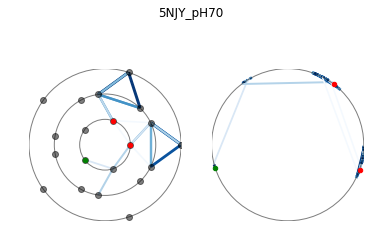


average shortest path length 20.82366115170348

radius: 29
diameter: 57
center: [1467.0, 1471.0]
density: 0.01198919284025667
 
In  5NJY_F238L_pH70


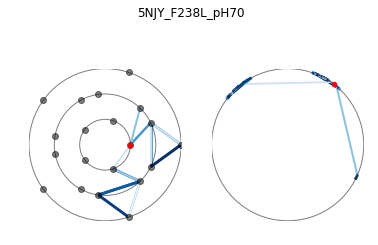


average shortest path length 19.358382877526754

radius: 26
diameter: 52
center: [542.0]
density: 0.016187739463601532
 
In  5NJY_I233T_pH70


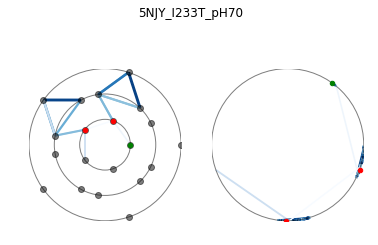


average shortest path length 18.648815426997245

radius: 22
diameter: 43
center: [1157.0, 1161.0]
density: 0.013747228381374724
 
In  5NJY_F238LI233T_pH70


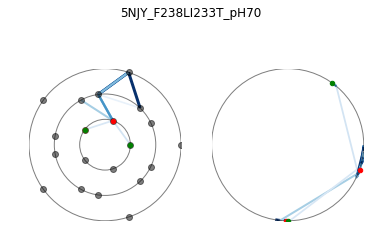


average shortest path length 11.880384478462085

radius: 15
diameter: 30
center: [1509.0]
density: 0.021203953279424977
 
In  5NJY_pH46


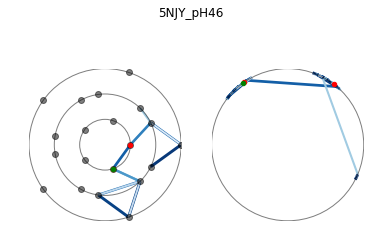


average shortest path length 12.589850085044104

radius: 17
diameter: 33
center: [527.0, 528.0]
density: 0.014568903749701457
 
In  5NJY_F238L_pH46


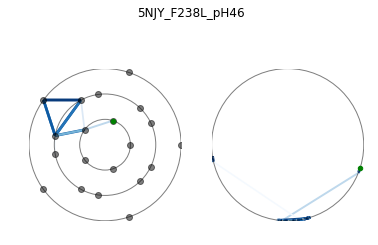


average shortest path length 10.041782393430745

radius: 15
diameter: 29
center: [1137.0, 1141.0, 1186.0]
density: 0.025396825396825397
 
In  5NJY_I233T_pH46


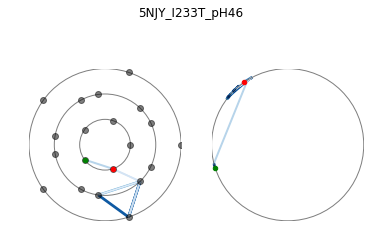


average shortest path length 12.164955923197681

radius: 17
diameter: 33
center: [568.0, 572.0]
density: 0.025152625152625153
 
In  5NJY_F238LI233T_pH46


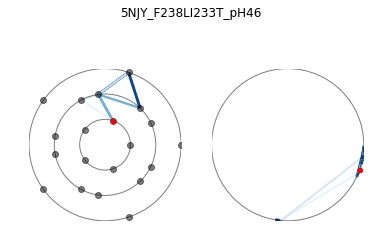


average shortest path length 9.546745867768594

radius: 12
diameter: 24
center: [1497.0]
density: 0.02690700104493208
 
In  4HFI_pH46


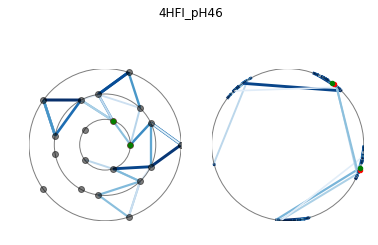


average shortest path length 35.65038857382903

radius: 48
diameter: 96
center: [265.0]
density: 0.008221343873517787
 
In  4HFI_F238L_pH46


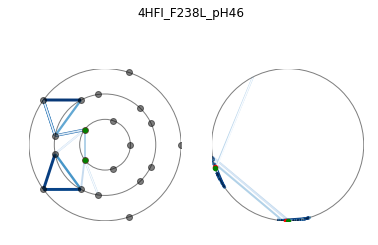


average shortest path length 21.84237246595007

radius: 29
diameter: 58
center: [913.0]
density: 0.013595378979994365
 
In  4HFI_I233T_pH46


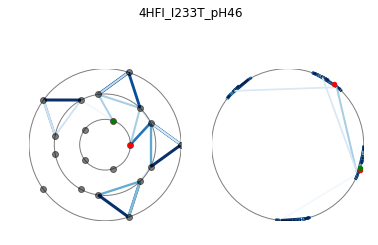


average shortest path length 27.7855286915929

radius: 40
diameter: 79
center: [1448.0, 1452.0]
density: 0.008664898320070735
 
In  4HFI_F238LI233T_pH46


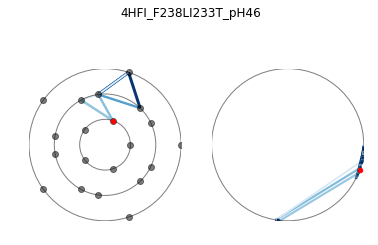


average shortest path length 11.545224006762469

radius: 14
diameter: 27
center: [1542.0, 1546.0]
density: 0.02564102564102564
 
In  4NPQ_pH70


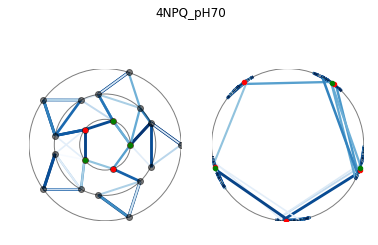


average shortest path length 27.121402296227473

radius: 36
diameter: 71
center: [1477.0, 1481.0]
density: 0.005271986580397795
 
In  4NPQ_F238L_pH70


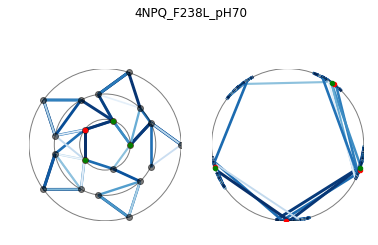


average shortest path length 25.44512533662652

radius: 29
diameter: 57
center: [1480.0, 1484.0]
density: 0.005179892033575686
 
In  4NPQ_I233T_pH70


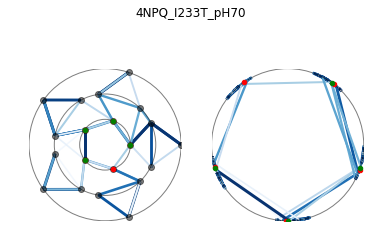


average shortest path length 27.113123032496034

radius: 39
diameter: 77
center: [1153.0, 1156.0]
density: 0.0049658410328949345
 
In  4NPQ_F238LI233T_pH70


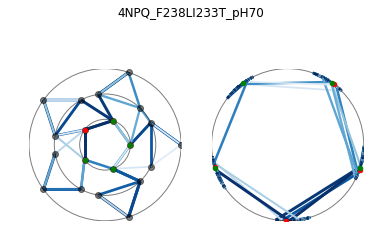


average shortest path length 31.461011266299447

radius: 37
diameter: 74
center: [1465.0]
density: 0.005025382266120548
 


In [41]:
for traj_notes in traj_notess:
    create_hbond_network_max(traj_notes)

In [47]:
def create_hbond_network_max_rep(traj_note, location = '/media/scottzhuang/data/MD/', skip=10):
    contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_2.csv')
    
    Hbond_network = nx.Graph()
    #Hbond_network.add_nodes_from(contact_map.residue1.values.astype(int))
    #Hbond_network.add_nodes_from(contact_map.residue2.values.astype(int))
    Hbond_network.add_nodes_from(np.arange(0,1555))
    pos_spring = nx.spring_layout(Hbond_network)
    pos_circular = nx.circular_layout(Hbond_network)
    #print(Hbond_network.number_of_nodes())
    for index,row in contact_map.iterrows():
        if (row['hbond'] >= 0.5)  & (row['residue1'] in pos_helix.keys()) & (row['residue2'] in pos_helix.keys()) :
            Hbond_network.add_edge(row['residue1'],row['residue2'],weight= row['hbond'])


    #print(Hbond_network.number_of_edges())
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    resid233 = np.arange(0,5) * 311 + 233 - 5
    resid238 = np.arange(0,5) * 311 + 238 - 5 
    
    plt.subplot(121,aspect='equal')    
    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
#    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'r','font_size':1}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)
    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    
#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    
    plt.axis('off')

    plt.subplot(122,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='green')
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')
    plt.suptitle(traj_note)
    plt.savefig('hbond_dat/rep/' + traj_note + '_max_network.pdf')
    plt.show()
    pathlengths = []

    for v in Hbond_network.nodes():
        spl = dict(nx.single_source_shortest_path_length(Hbond_network, v))
        for p in spl:
            pathlengths.append(spl[p])
    
    print('')
    print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))
    print('')
#   print("length #paths")
    dist = {}
    for p in pathlengths:
        if p in dist:
            dist[p] += 1
        else:
            dist[p] = 1
    verts = dist.keys()
    #for d in sorted(verts):
    #    print('%s %d' % (d, dist[d]))
    
    print("radius: %d" % nx.radius(Hbond_network))
    print("diameter: %d" % nx.diameter(Hbond_network))
    #print("eccentricity: %s" % nx.eccentricity(Hbond_network))
    print("center: %s" % nx.center(Hbond_network))
    #print("periphery: %s" % nx.periphery(Hbond_network))
    print("density: %s" % nx.density(Hbond_network))
    print(" ")



In [84]:
def create_hbond_network_robust(traj_note,i, location = '/media/scottzhuang/data/MD/', skip=10):
    contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_robust_' + str(i) + '.csv')
    
    Hbond_network = nx.Graph()
    #Hbond_network.add_nodes_from(contact_map.residue1.values.astype(int))
    #Hbond_network.add_nodes_from(contact_map.residue2.values.astype(int))
    Hbond_network.add_nodes_from(np.arange(0,1555))
#    pos_spring = nx.spring_layout(Hbond_network)
    pos_circular = nx.circular_layout(Hbond_network)
    #print(Hbond_network.number_of_nodes())
    for index,row in contact_map.iterrows():
        if (row['hbond'] >= 0.5) & (row['residue1'] in pos_helix.keys()) & (row['residue2'] in pos_helix.keys()) :
            Hbond_network.add_edge(row['residue1'],row['residue2'],weight= row['hbond'])

    #print(Hbond_network.number_of_edges())
    #Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    resid233 = np.arange(0,5) * 311 + 233 - 5
    resid238 = np.arange(0,5) * 311 + 238 - 5 
    fig = plt.subplots(figsize=(20, 20))
    plt.subplot(221,aspect='equal')    
    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]

#    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
#    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)

#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.axis('off')

    plt.subplot(222,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')

    pathlengths = []
    
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    
    plt.subplot(223,aspect='equal')    
    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'r','font_size':1,'alpha':0.3}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)
    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    
#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    
    plt.axis('off')

    plt.subplot(224,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='green')
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')
#    plt.savefig('hbond_dat/' + note + '_max_network.pdf')
    plt.suptitle(traj_note + '_robust_' + str(i))
    plt.savefig('hbond_dat/' + traj_note + '_network_robust_' + str(i) + '.png')
    plt.show()


In [86]:
def create_hbond_network_all_max(traj_note, location = '/media/scottzhuang/data/MD/', skip=10):
    contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_2.csv')
    
    Hbond_network = nx.Graph()
    #Hbond_network.add_nodes_from(contact_map.residue1.values.astype(int))
    #Hbond_network.add_nodes_from(contact_map.residue2.values.astype(int))
    Hbond_network.add_nodes_from(np.arange(0,1555))
#    pos_spring = nx.spring_layout(Hbond_network)
    pos_circular = nx.circular_layout(Hbond_network)
    #print(Hbond_network.number_of_nodes())
    for index,row in contact_map.iterrows():
        if (row['hbond'] >= 0.5) & (row['residue1'] in pos_helix.keys()) & (row['residue2'] in pos_helix.keys()) :
            Hbond_network.add_edge(row['residue1'],row['residue2'],weight= row['hbond'])

    #print(Hbond_network.number_of_edges())
    #Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    resid233 = np.arange(0,5) * 311 + 233 - 5
    resid238 = np.arange(0,5) * 311 + 238 - 5 
    fig = plt.subplots(figsize=(20, 20))
    plt.subplot(221,aspect='equal')    
    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]

#    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
#    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)

#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.axis('off')

    plt.subplot(222,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')

    pathlengths = []
    
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    
    plt.subplot(223,aspect='equal')    
    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'r','font_size':1,'alpha':0.3}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)
    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    
#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    
    plt.axis('off')

    plt.subplot(224,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='green')
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')
#    plt.savefig('hbond_dat/' + note + '_max_network.pdf')
    plt.suptitle(traj_note)
    plt.savefig('hbond_dat/' + traj_note + '_network_complete.png')
    plt.show()


In [87]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(create_hbond_network_all_max)(traj_note) for traj_note in traj_notes)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [85]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(create_hbond_network_robust)(traj_note,i) for (traj_note,i) in itertools.product(traj_notes,[0,1,2]))

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,

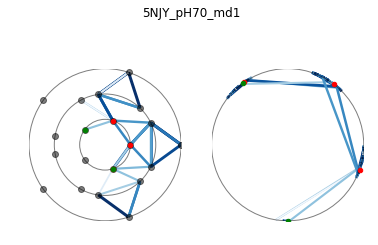


average shortest path length 23.614726752358212

radius: 29
diameter: 58
center: [224.0]
density: 0.009522837805666089
 


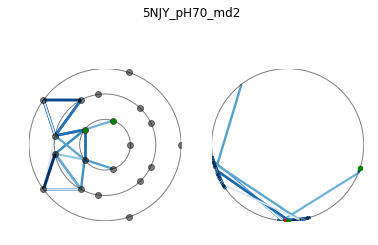


average shortest path length 14.79313142239048

radius: 22
diameter: 37
center: [1182.0, 1231.0, 1235.0, 909.0, 913.0]
density: 0.013123895008839929
 


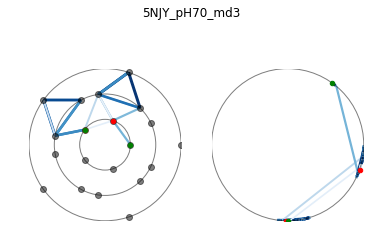


average shortest path length 15.019568236333797

radius: 19
diameter: 37
center: [1159.0, 1163.0]
density: 0.012822954357900082
 


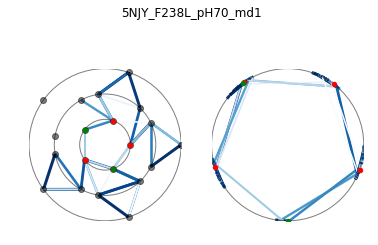


average shortest path length 28.322373222715978

radius: 31
diameter: 61
center: [234.0, 238.0]
density: 0.007153977314849136
 


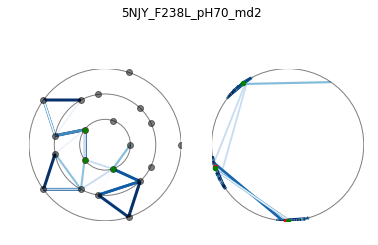


average shortest path length 15.931523022432113

radius: 23
diameter: 46
center: [830.0]
density: 0.009787314135140222
 


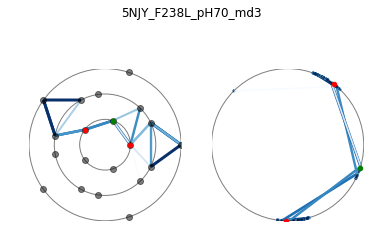


average shortest path length 16.708310204081634

radius: 25
diameter: 49
center: [1148.0, 1461.0]
density: 0.012873563218390805
 


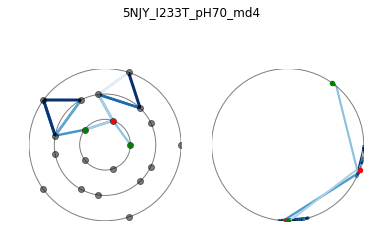


average shortest path length 17.58378682679677

radius: 23
diameter: 46
center: [1479.0]
density: 0.015965989607935757
 


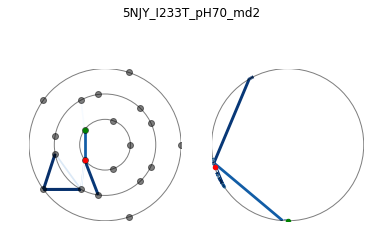


average shortest path length 11.352468768590125

radius: 14
diameter: 27
center: [844.0, 848.0]
density: 0.028003613369467027
 


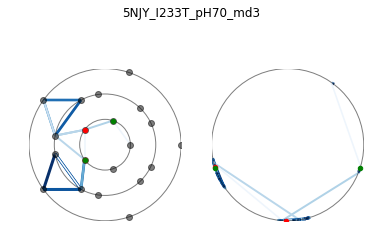


average shortest path length 11.313131313131313

radius: 14
diameter: 27
center: [1197.0, 1201.0]
density: 0.01426459719142646
 


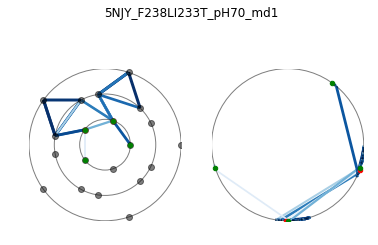


average shortest path length 15.360997229916897

radius: 19
diameter: 38
center: [1157.0]
density: 0.01241993873572821
 


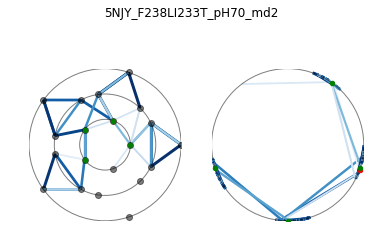


average shortest path length 19.372687557842152

radius: 25
diameter: 49
center: [1163.0, 1164.0, 1167.0]
density: 0.007407259513636545
 


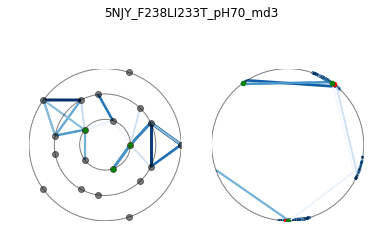


average shortest path length 19.08207229687965

radius: 23
diameter: 46
center: [1466.0]
density: 0.011225616488774383
 


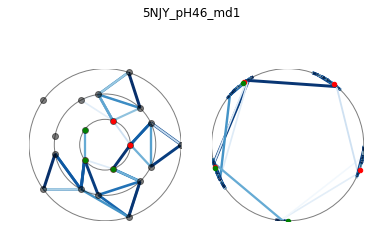


average shortest path length 25.093361744842344

radius: 32
diameter: 63
center: [527.0, 528.0]
density: 0.006923837784371909
 


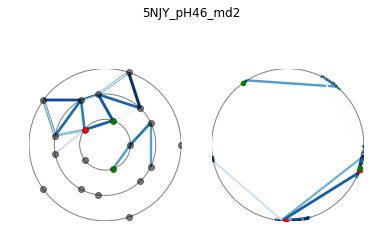


average shortest path length 19.13566897347174

radius: 27
diameter: 53
center: [1472.0, 1476.0]
density: 0.011107891432435043
 


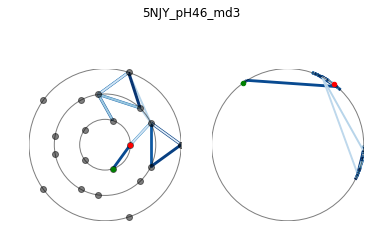


average shortest path length 15.29387269482451

radius: 22
diameter: 43
center: [253.0, 249.0]
density: 0.01384108933113871
 


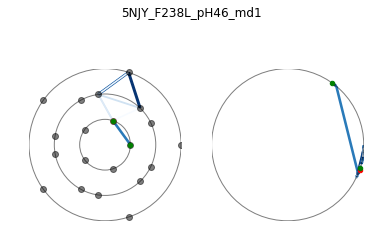


average shortest path length 10.864667435601692

radius: 15
diameter: 30
center: [1462.0]
density: 0.0219374878664337
 


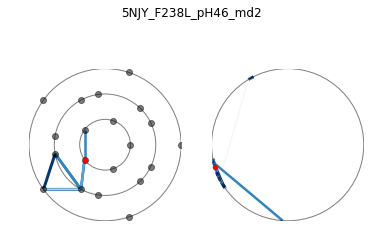


average shortest path length 9.606146694214877

radius: 13
diameter: 25
center: [822.0, 826.0]
density: 0.025600835945663532
 


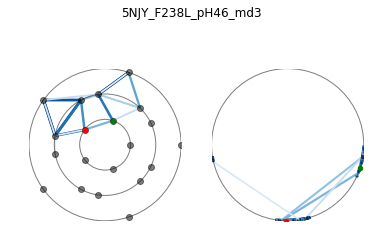


average shortest path length 13.760932752014797

radius: 18
diameter: 35
center: [1224.0, 1517.0]
density: 0.013421035147166301
 


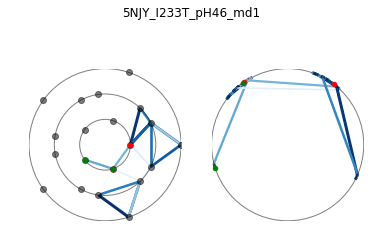


average shortest path length 14.579408442965722

radius: 19
diameter: 37
center: [528.0, 583.0]
density: 0.012645794966236955
 


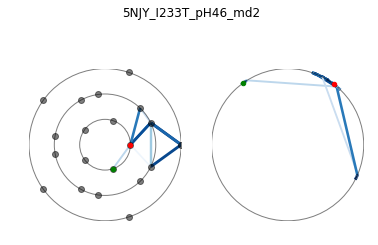


average shortest path length 10.559335180055403

radius: 14
diameter: 28
center: [211.0]
density: 0.02463605823068309
 


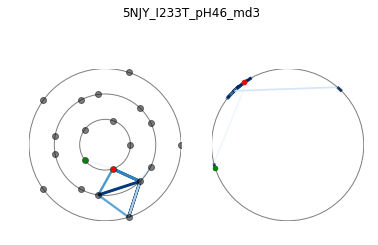


average shortest path length 11.858433414815602

radius: 17
diameter: 34
center: [609.0]
density: 0.02384020618556701
 


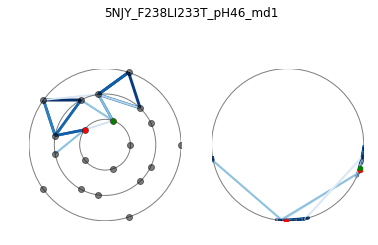


average shortest path length 12.886097337006428

radius: 18
diameter: 35
center: [1224.0, 1517.0, 1521.0]
density: 0.014190687361419069
 


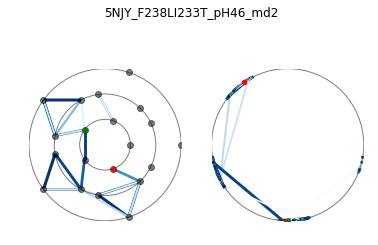


average shortest path length 19.58886693108166

radius: 27
diameter: 54
center: [909.0]
density: 0.008572379737002719
 


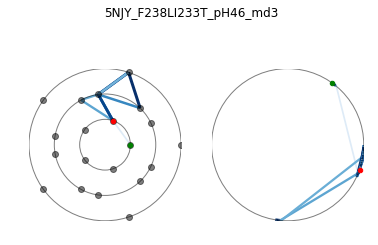


average shortest path length 10.414847645429363

radius: 15
diameter: 30
center: [1495.0]
density: 0.023964165733482642
 


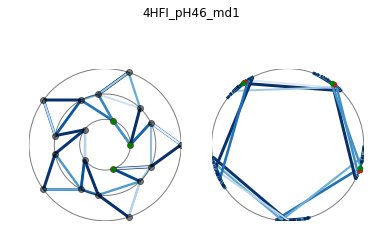


average shortest path length 30.96392784472026

radius: 42
diameter: 84
center: [571.0]
density: 0.0053655264922870555
 


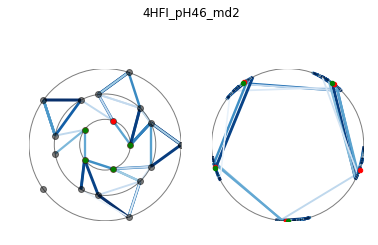


average shortest path length 32.3965856246684

radius: 46
diameter: 92
center: [204.0]
density: 0.006400325493325822
 


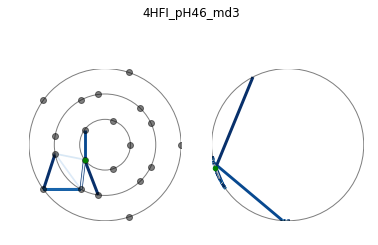


average shortest path length 10.498628257887518

radius: 14
diameter: 28
center: [841.0]
density: 0.020595361716857045
 


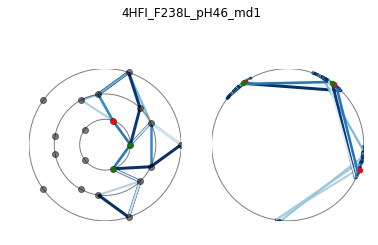


average shortest path length 24.15864965315515

radius: 33
diameter: 66
center: [211.0]
density: 0.008322559793148028
 


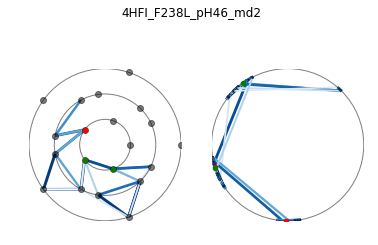


average shortest path length 18.74571851851852

radius: 26
diameter: 51
center: [871.0, 875.0]
density: 0.010079365079365079
 


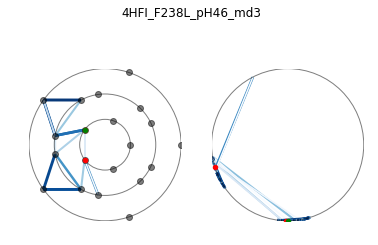


average shortest path length 14.329262850419894

radius: 18
diameter: 36
center: [1150.0]
density: 0.014943655071043607
 


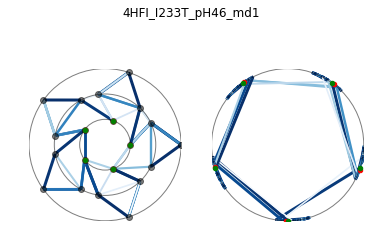


average shortest path length 21.637644855224334

radius: 28
diameter: 51
center: [842.0]
density: 0.004902228782825798
 


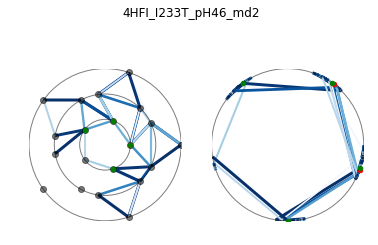


average shortest path length 23.083578188107428

radius: 39
diameter: 51
center: [519.0, 522.0, 571.0, 575.0, 578.0, 598.0, 602.0, 1159.0, 221.0, 222.0, 225.0, 229.0, 269.0, 273.0, 1455.0, 1535.0]
density: 0.007275093156680665
 


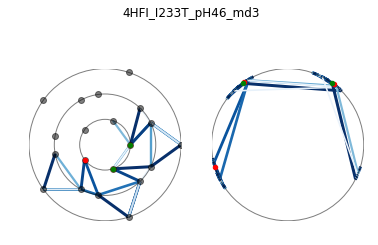


average shortest path length 21.816436767578125

radius: 30
diameter: 59
center: [206.0, 209.0]
density: 0.008884803921568627
 


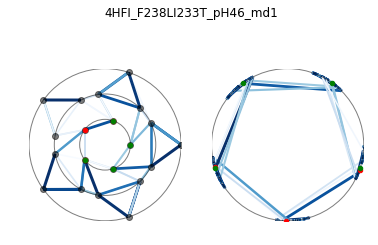


average shortest path length 27.787294050807564

radius: 39
diameter: 78
center: [209.0]
density: 0.005145099953226364
 


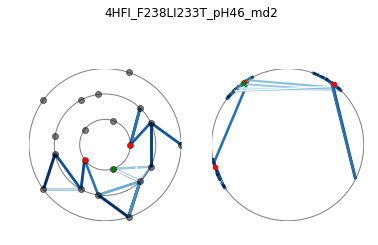


average shortest path length 17.769045857988164

radius: 23
diameter: 46
center: [509.0]
density: 0.011241174284652546
 


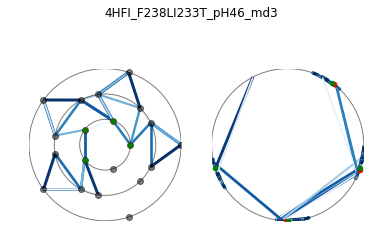


average shortest path length 25.75167019716474

radius: 35
diameter: 69
center: [1473.0, 1477.0]
density: 0.007249581754898756
 


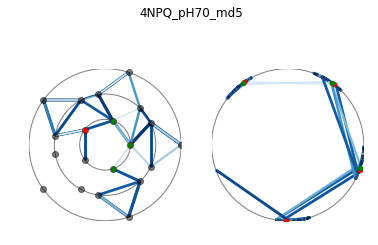


average shortest path length 23.655960584735514

radius: 29
diameter: 57
center: [261.0, 262.0, 266.0]
density: 0.006528286528286529
 


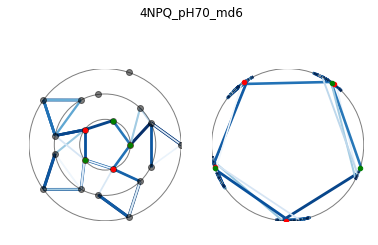


average shortest path length 24.674230476504327

radius: 33
diameter: 65
center: [1473.0, 1477.0]
density: 0.006326125956000378
 


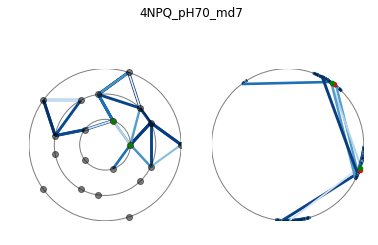


average shortest path length 19.163488

radius: 24
diameter: 47
center: [226.0, 254.0, 258.0]
density: 0.009092369477911647
 


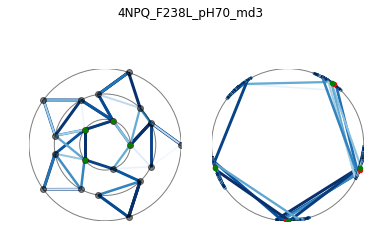


average shortest path length 25.767906976744186

radius: 32
diameter: 63
center: [238.0, 1484.0]
density: 0.005366726296958855
 


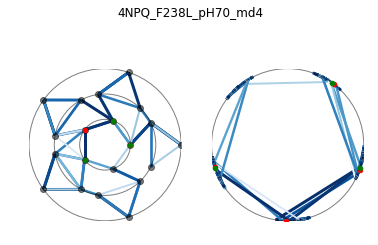


average shortest path length 22.50973567289777

radius: 28
diameter: 52
center: [1197.0, 1201.0, 1204.0]
density: 0.005140517745559762
 


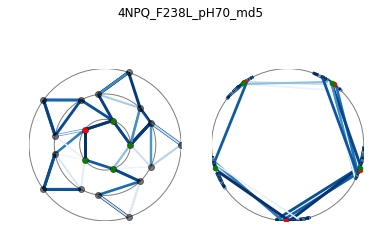


average shortest path length 24.281145679012347

radius: 27
diameter: 53
center: [238.0, 1484.0]
density: 0.005087849542192526
 


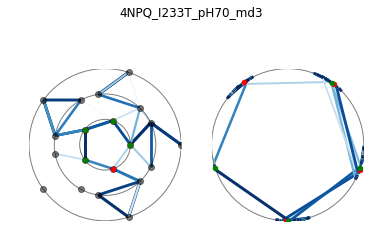


average shortest path length 22.636904761904763

radius: 29
diameter: 58
center: [1484.0]
density: 0.006574271499644634
 


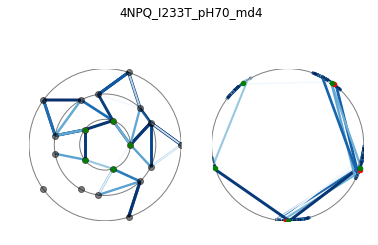


average shortest path length 20.596181435243125

radius: 26
diameter: 51
center: [222.0, 225.0]
density: 0.006443121470439694
 


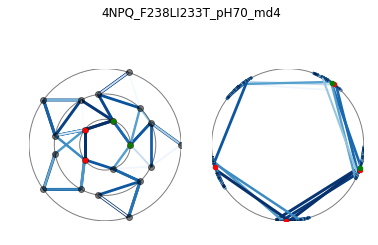


average shortest path length 28.60092575217364

radius: 44
diameter: 87
center: [1151.0, 1155.0]
density: 0.005151353667074177
 


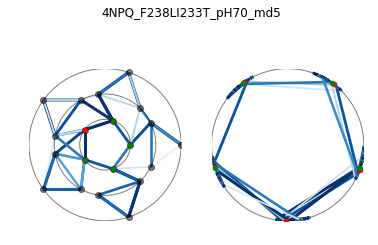


average shortest path length 22.759069101927448

radius: 33
diameter: 61
center: [1154.0, 1159.0]
density: 0.005198776758409786
 


In [54]:
for traj_note in traj_notes:
    create_hbond_network_max_rep(traj_note)

In [42]:
def create_hbond_network_all(traj_notes, location = '/media/scottzhuang/data/MD/', skip=10):
    contact_map,note = gather_hbond_replicates(traj_notes)
    Hbond_network = nx.Graph()
    #Hbond_network.add_nodes_from(contact_map.residue1.values.astype(int))
    #Hbond_network.add_nodes_from(contact_map.residue2.values.astype(int))
    Hbond_network.add_nodes_from(np.arange(0,1555))
    pos_spring = nx.spring_layout(Hbond_network)
    pos_circular = nx.circular_layout(Hbond_network)
    #print(Hbond_network.number_of_nodes())
    for index,row in contact_map.iterrows():
        if (row['hbond'] >= 0.5)  & (row['residue1'] in pos_helix.keys()) & (row['residue2'] in pos_helix.keys()) :
            Hbond_network.add_edge(row['residue1'],row['residue2'],weight= row['hbond'])


    #print(Hbond_network.number_of_edges())
    #Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    resid233 = np.arange(0,5) * 311 + 233 - 5
    resid238 = np.arange(0,5) * 311 + 238 - 5 
    
    plt.subplot(121,aspect='equal')    
    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
#    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'r','font_size':1}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)
    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    
#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    
    plt.axis('off')

    plt.subplot(122,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='green')
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')
    plt.suptitle(traj_notes[0][:-4])
    plt.savefig('hbond_dat/' + note + '_all_network_2.pdf')
    plt.show()
    pathlengths = []
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)

    for v in Hbond_network.nodes():
        spl = dict(nx.single_source_shortest_path_length(Hbond_network, v))
        for p in spl:
            pathlengths.append(spl[p])
    
    print('')
    print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))
    print('')
#   print("length #paths")
    dist = {}
    for p in pathlengths:
        if p in dist:
            dist[p] += 1
        else:
            dist[p] = 1
    verts = dist.keys()
    #for d in sorted(verts):
    #    print('%s %d' % (d, dist[d]))
    
    print("radius: %d" % nx.radius(Hbond_network))
    print("diameter: %d" % nx.diameter(Hbond_network))
    #print("eccentricity: %s" % nx.eccentricity(Hbond_network))
    print("center: %s" % nx.center(Hbond_network))
    #print("periphery: %s" % nx.periphery(Hbond_network))
    print("density: %s" % nx.density(Hbond_network))
    print(" ")



In  5NJY_pH70


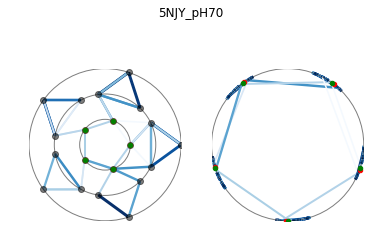


average shortest path length 20.82366115170348

radius: 29
diameter: 57
center: [1467.0, 1471.0]
density: 0.01198919284025667
 
In  5NJY_F238L_pH70


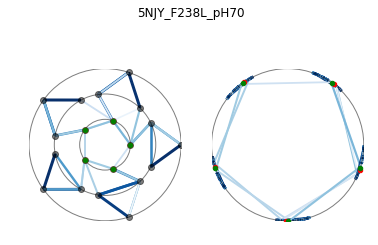


average shortest path length 19.358382877526754

radius: 26
diameter: 52
center: [542.0]
density: 0.016187739463601532
 
In  5NJY_I233T_pH70


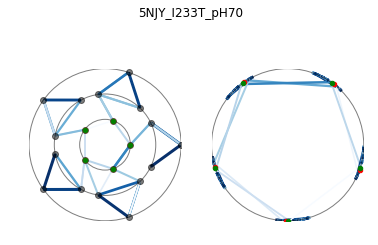


average shortest path length 18.648815426997245

radius: 22
diameter: 43
center: [1157.0, 1161.0]
density: 0.013747228381374724
 
In  5NJY_F238LI233T_pH70


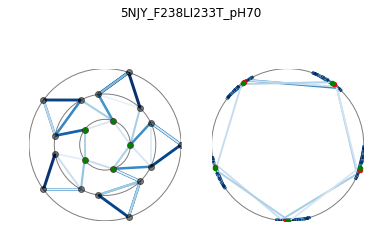


average shortest path length 11.880384478462085

radius: 15
diameter: 30
center: [1509.0]
density: 0.021203953279424977
 
In  5NJY_pH46


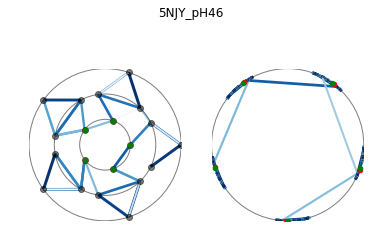


average shortest path length 12.589850085044104

radius: 17
diameter: 33
center: [527.0, 528.0]
density: 0.014568903749701457
 
In  5NJY_F238L_pH46


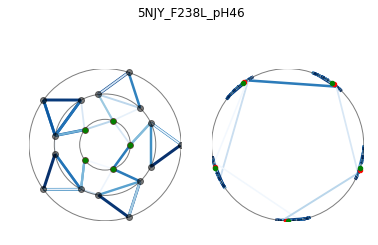


average shortest path length 10.041782393430745

radius: 15
diameter: 29
center: [1137.0, 1141.0, 1186.0]
density: 0.025396825396825397
 
In  5NJY_I233T_pH46


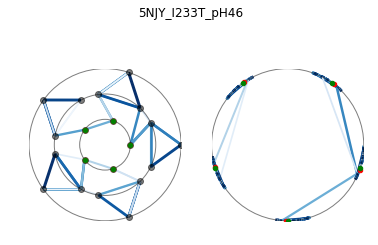


average shortest path length 12.164955923197681

radius: 17
diameter: 33
center: [568.0, 572.0]
density: 0.025152625152625153
 
In  5NJY_F238LI233T_pH46


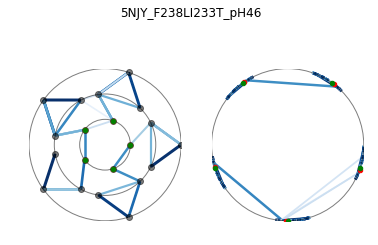


average shortest path length 9.546745867768594

radius: 12
diameter: 24
center: [1497.0]
density: 0.02690700104493208
 
In  4HFI_pH46


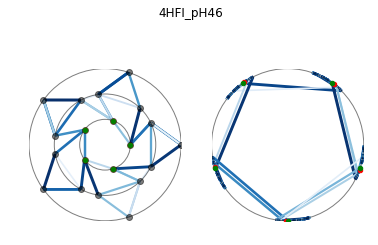


average shortest path length 35.65038857382903

radius: 48
diameter: 96
center: [265.0]
density: 0.008221343873517787
 
In  4HFI_F238L_pH46


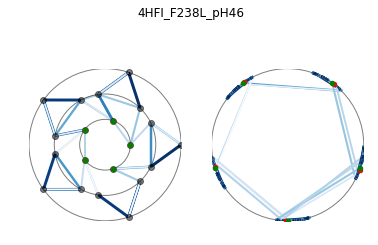


average shortest path length 21.84237246595007

radius: 29
diameter: 58
center: [913.0]
density: 0.013595378979994365
 
In  4HFI_I233T_pH46


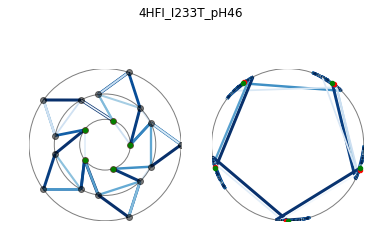


average shortest path length 27.7855286915929

radius: 40
diameter: 79
center: [1448.0, 1452.0]
density: 0.008664898320070735
 
In  4HFI_F238LI233T_pH46


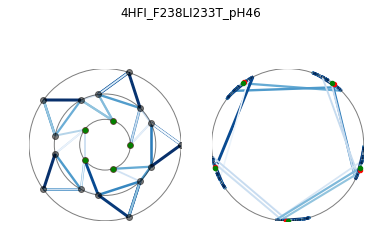


average shortest path length 11.545224006762469

radius: 14
diameter: 27
center: [1542.0, 1546.0]
density: 0.02564102564102564
 
In  4NPQ_pH70


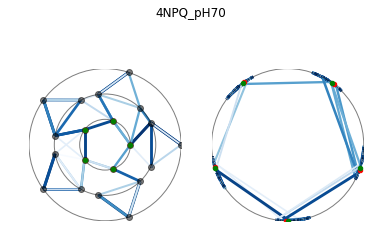


average shortest path length 27.121402296227473

radius: 36
diameter: 71
center: [1477.0, 1481.0]
density: 0.005271986580397795
 
In  4NPQ_F238L_pH70


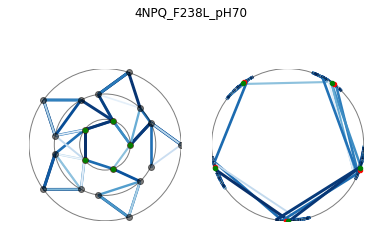


average shortest path length 25.44512533662652

radius: 29
diameter: 57
center: [1480.0, 1484.0]
density: 0.005179892033575686
 
In  4NPQ_I233T_pH70


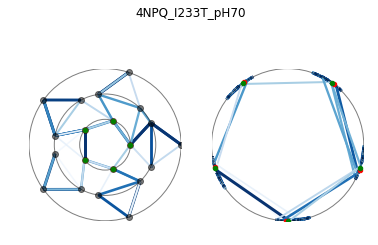


average shortest path length 27.113123032496034

radius: 39
diameter: 77
center: [1153.0, 1156.0]
density: 0.0049658410328949345
 
In  4NPQ_F238LI233T_pH70


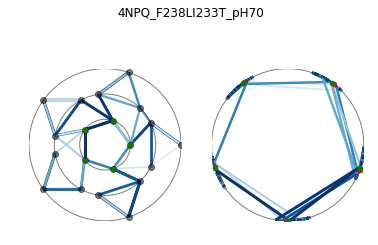


average shortest path length 31.461011266299447

radius: 37
diameter: 74
center: [1465.0]
density: 0.005025382266120548
 


In [44]:
for traj_notes in traj_notess:
    create_hbond_network_all(traj_notes)

In [55]:
def create_hbond_network_all_rep(traj_note, location = '/media/scottzhuang/data/MD/', skip=10):
    contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_2.csv')
    Hbond_network = nx.Graph()
    #Hbond_network.add_nodes_from(contact_map.residue1.values.astype(int))
    #Hbond_network.add_nodes_from(contact_map.residue2.values.astype(int))
    Hbond_network.add_nodes_from(np.arange(0,1555))
    pos_spring = nx.spring_layout(Hbond_network)
    pos_circular = nx.circular_layout(Hbond_network)
    #print(Hbond_network.number_of_nodes())
    for index,row in contact_map.iterrows():
        if (row['hbond'] >= 0.5)  & (row['residue1'] in pos_helix.keys()) & (row['residue2'] in pos_helix.keys()) :
            Hbond_network.add_edge(row['residue1'],row['residue2'],weight= row['hbond'])


    #print(Hbond_network.number_of_edges())
    #Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    resid233 = np.arange(0,5) * 311 + 233 - 5
    resid238 = np.arange(0,5) * 311 + 238 - 5 
    
    plt.subplot(121,aspect='equal')    
    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
#    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'r','font_size':1}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)
    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    
#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    
    plt.axis('off')

    plt.subplot(122,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='green')
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')
    plt.suptitle(traj_note)
    plt.savefig('hbond_dat/rep/' + traj_note + '_all_network.pdf')
    plt.show()
    pathlengths = []
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)

    for v in Hbond_network.nodes():
        spl = dict(nx.single_source_shortest_path_length(Hbond_network, v))
        for p in spl:
            pathlengths.append(spl[p])
    
    print('')
    print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))
    print('')
#   print("length #paths")
    dist = {}
    for p in pathlengths:
        if p in dist:
            dist[p] += 1
        else:
            dist[p] = 1
    verts = dist.keys()
    #for d in sorted(verts):
    #    print('%s %d' % (d, dist[d]))
    
    print("radius: %d" % nx.radius(Hbond_network))
    print("diameter: %d" % nx.diameter(Hbond_network))
    #print("eccentricity: %s" % nx.eccentricity(Hbond_network))
    print("center: %s" % nx.center(Hbond_network))
    #print("periphery: %s" % nx.periphery(Hbond_network))
    print("density: %s" % nx.density(Hbond_network))
    print(" ")



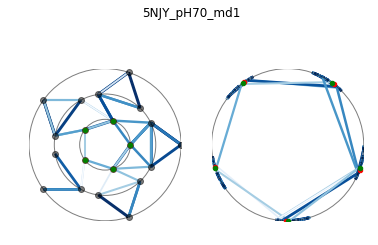


average shortest path length 23.614726752358212

radius: 29
diameter: 58
center: [224.0]
density: 0.009522837805666089
 


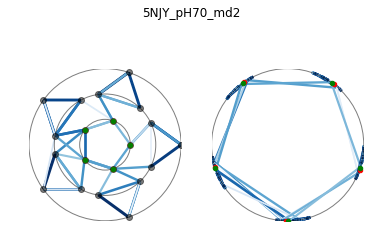


average shortest path length 14.79313142239048

radius: 22
diameter: 37
center: [1182.0, 1231.0, 1235.0, 909.0, 913.0]
density: 0.013123895008839929
 


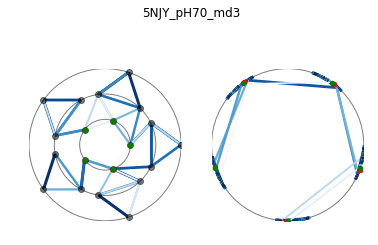


average shortest path length 15.019568236333797

radius: 19
diameter: 37
center: [1159.0, 1163.0]
density: 0.012822954357900082
 


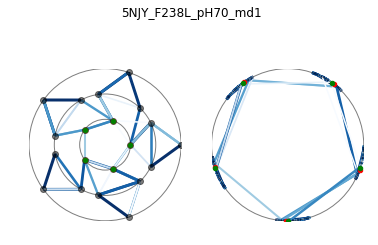


average shortest path length 28.322373222715978

radius: 31
diameter: 61
center: [234.0, 238.0]
density: 0.007153977314849136
 


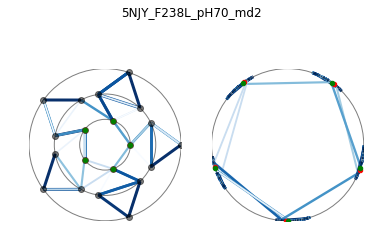


average shortest path length 15.931523022432113

radius: 23
diameter: 46
center: [830.0]
density: 0.009787314135140222
 


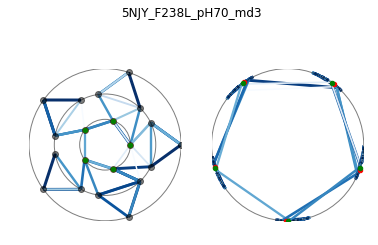


average shortest path length 16.708310204081634

radius: 25
diameter: 49
center: [1148.0, 1461.0]
density: 0.012873563218390805
 


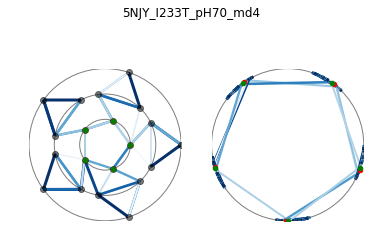


average shortest path length 17.58378682679677

radius: 23
diameter: 46
center: [1479.0]
density: 0.015965989607935757
 


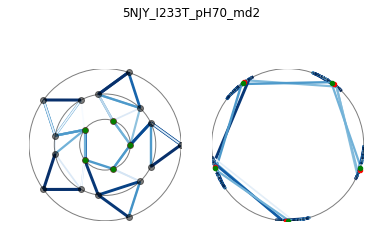


average shortest path length 11.352468768590125

radius: 14
diameter: 27
center: [844.0, 848.0]
density: 0.028003613369467027
 


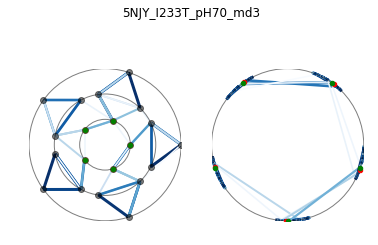


average shortest path length 11.313131313131313

radius: 14
diameter: 27
center: [1197.0, 1201.0]
density: 0.01426459719142646
 


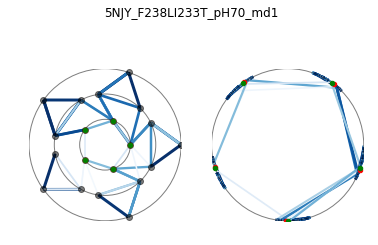


average shortest path length 15.360997229916897

radius: 19
diameter: 38
center: [1157.0]
density: 0.01241993873572821
 


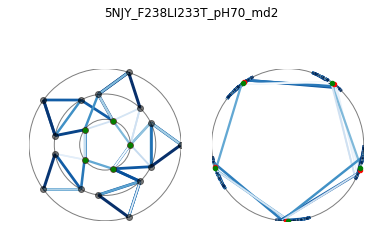


average shortest path length 19.372687557842152

radius: 25
diameter: 49
center: [1163.0, 1164.0, 1167.0]
density: 0.007407259513636545
 


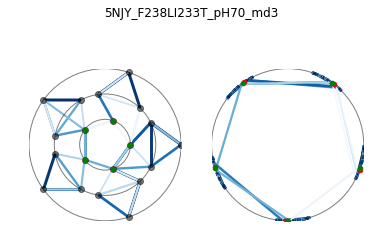


average shortest path length 19.08207229687965

radius: 23
diameter: 46
center: [1466.0]
density: 0.011225616488774383
 


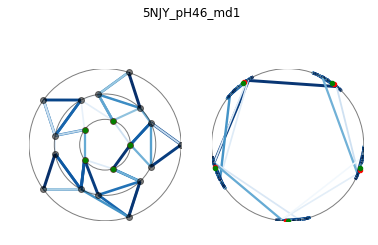


average shortest path length 25.093361744842344

radius: 32
diameter: 63
center: [527.0, 528.0]
density: 0.006923837784371909
 


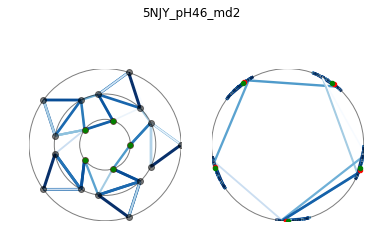


average shortest path length 19.13566897347174

radius: 27
diameter: 53
center: [1472.0, 1476.0]
density: 0.011107891432435043
 


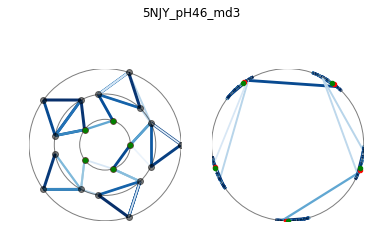


average shortest path length 15.29387269482451

radius: 22
diameter: 43
center: [253.0, 249.0]
density: 0.01384108933113871
 


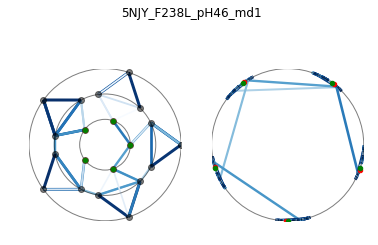


average shortest path length 10.864667435601692

radius: 15
diameter: 30
center: [1462.0]
density: 0.0219374878664337
 


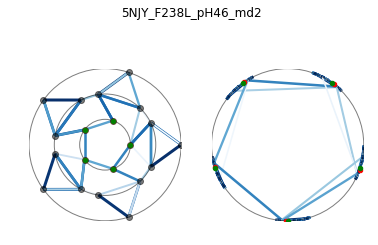


average shortest path length 9.606146694214877

radius: 13
diameter: 25
center: [822.0, 826.0]
density: 0.025600835945663532
 


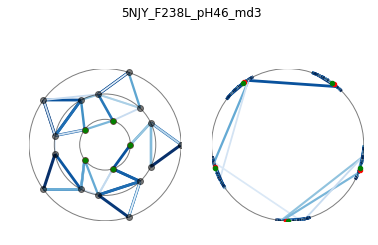


average shortest path length 13.760932752014797

radius: 18
diameter: 35
center: [1224.0, 1517.0]
density: 0.013421035147166301
 


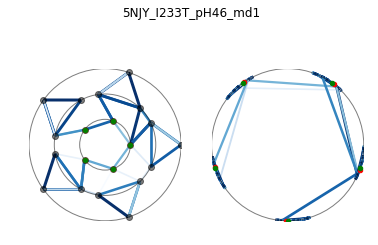


average shortest path length 14.579408442965722

radius: 19
diameter: 37
center: [528.0, 583.0]
density: 0.012645794966236955
 


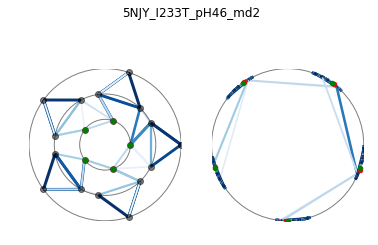


average shortest path length 10.559335180055403

radius: 14
diameter: 28
center: [211.0]
density: 0.02463605823068309
 


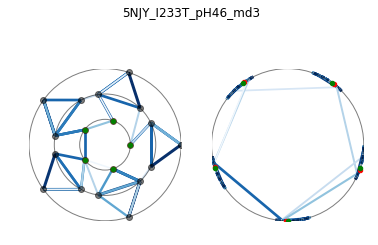


average shortest path length 11.858433414815602

radius: 17
diameter: 34
center: [609.0]
density: 0.02384020618556701
 


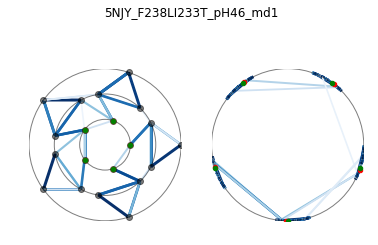


average shortest path length 12.886097337006428

radius: 18
diameter: 35
center: [1224.0, 1517.0, 1521.0]
density: 0.014190687361419069
 


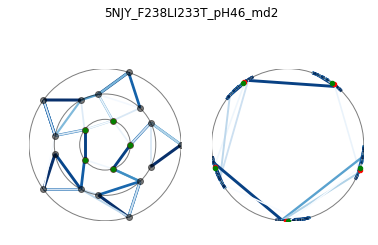


average shortest path length 19.58886693108166

radius: 27
diameter: 54
center: [909.0]
density: 0.008572379737002719
 


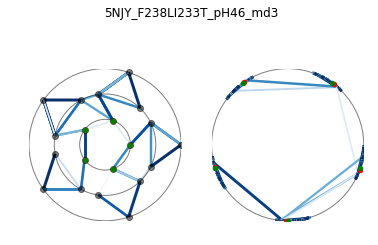


average shortest path length 10.414847645429363

radius: 15
diameter: 30
center: [1495.0]
density: 0.023964165733482642
 


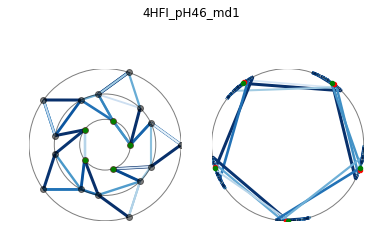


average shortest path length 30.96392784472026

radius: 42
diameter: 84
center: [571.0]
density: 0.0053655264922870555
 


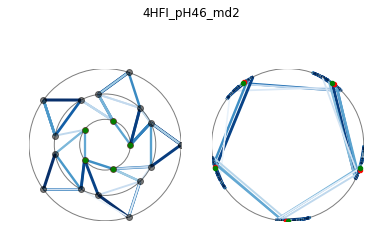


average shortest path length 32.3965856246684

radius: 46
diameter: 92
center: [204.0]
density: 0.006400325493325822
 


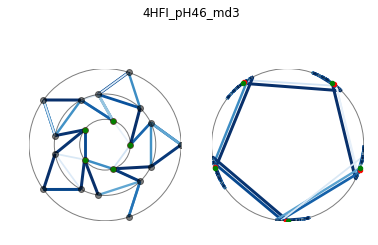


average shortest path length 10.498628257887518

radius: 14
diameter: 28
center: [841.0]
density: 0.020595361716857045
 


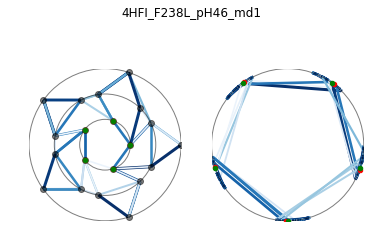


average shortest path length 24.15864965315515

radius: 33
diameter: 66
center: [211.0]
density: 0.008322559793148028
 


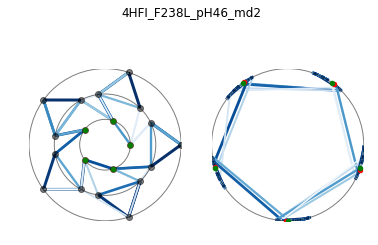


average shortest path length 18.74571851851852

radius: 26
diameter: 51
center: [871.0, 875.0]
density: 0.010079365079365079
 


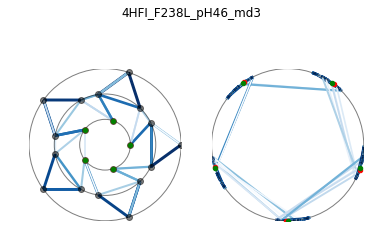


average shortest path length 14.329262850419894

radius: 18
diameter: 36
center: [1150.0]
density: 0.014943655071043607
 


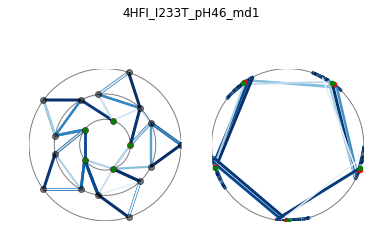


average shortest path length 21.637644855224334

radius: 28
diameter: 51
center: [842.0]
density: 0.004902228782825798
 


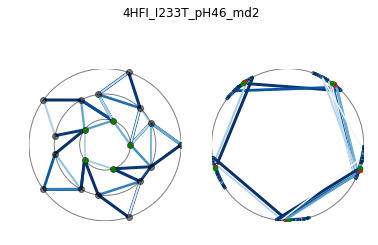


average shortest path length 23.083578188107428

radius: 39
diameter: 51
center: [519.0, 522.0, 571.0, 575.0, 578.0, 598.0, 602.0, 1159.0, 221.0, 222.0, 225.0, 229.0, 269.0, 273.0, 1455.0, 1535.0]
density: 0.007275093156680665
 


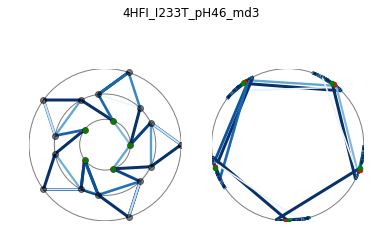


average shortest path length 21.816436767578125

radius: 30
diameter: 59
center: [206.0, 209.0]
density: 0.008884803921568627
 


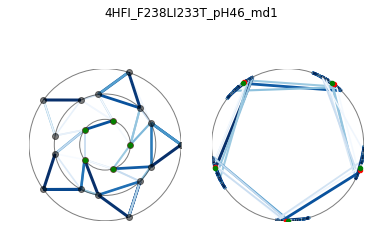


average shortest path length 27.787294050807564

radius: 39
diameter: 78
center: [209.0]
density: 0.005145099953226364
 


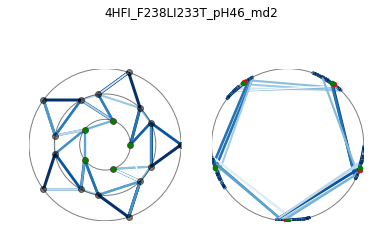


average shortest path length 17.769045857988164

radius: 23
diameter: 46
center: [509.0]
density: 0.011241174284652546
 


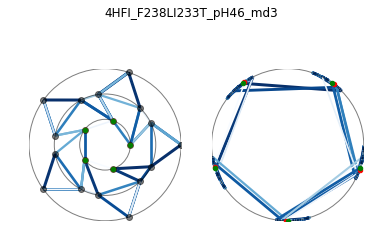


average shortest path length 25.75167019716474

radius: 35
diameter: 69
center: [1473.0, 1477.0]
density: 0.007249581754898756
 


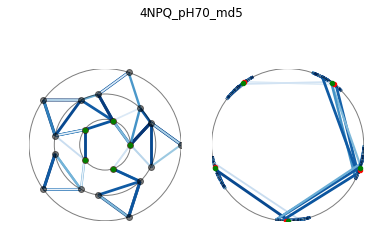


average shortest path length 23.655960584735514

radius: 29
diameter: 57
center: [261.0, 262.0, 266.0]
density: 0.006528286528286529
 


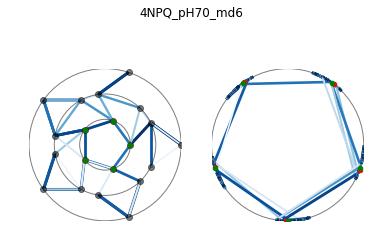


average shortest path length 24.674230476504327

radius: 33
diameter: 65
center: [1473.0, 1477.0]
density: 0.006326125956000378
 


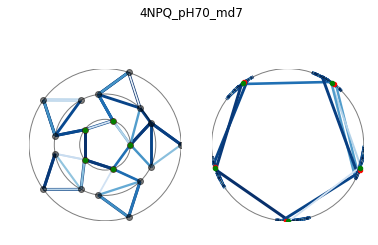


average shortest path length 19.163488

radius: 24
diameter: 47
center: [226.0, 254.0, 258.0]
density: 0.009092369477911647
 


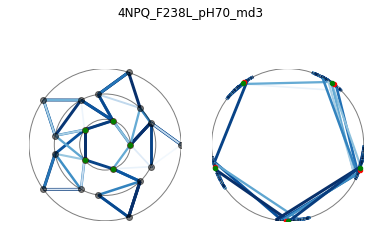


average shortest path length 25.767906976744186

radius: 32
diameter: 63
center: [238.0, 1484.0]
density: 0.005366726296958855
 


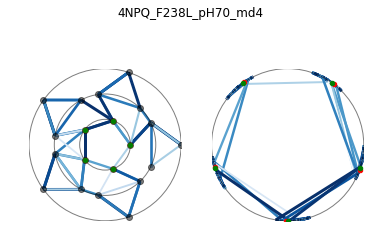


average shortest path length 22.50973567289777

radius: 28
diameter: 52
center: [1197.0, 1201.0, 1204.0]
density: 0.005140517745559762
 


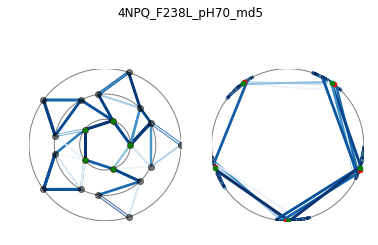


average shortest path length 24.281145679012347

radius: 27
diameter: 53
center: [238.0, 1484.0]
density: 0.005087849542192526
 


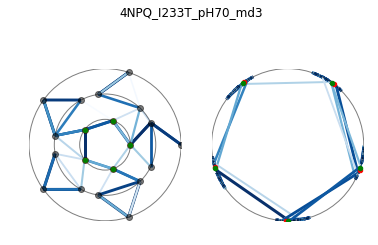


average shortest path length 22.636904761904763

radius: 29
diameter: 58
center: [1484.0]
density: 0.006574271499644634
 


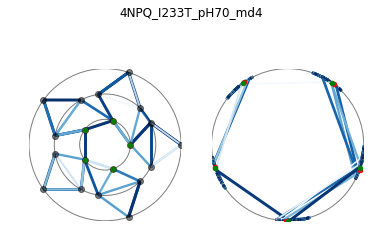


average shortest path length 20.596181435243125

radius: 26
diameter: 51
center: [222.0, 225.0]
density: 0.006443121470439694
 


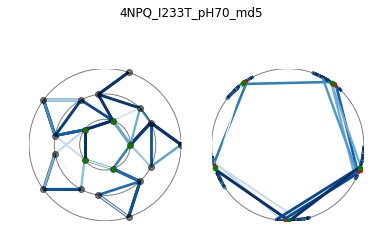


average shortest path length 25.547559861591697

radius: 39
diameter: 58
center: [238.0, 1484.0]
density: 0.005316315205327414
 


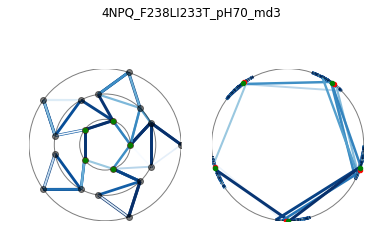


average shortest path length 25.11102945333258

radius: 33
diameter: 65
center: [249.0, 302.0]
density: 0.008313235919988652
 


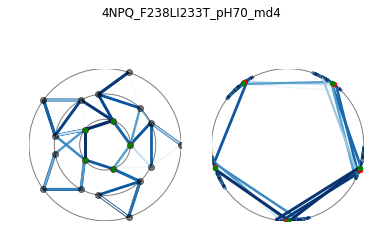


average shortest path length 28.60092575217364

radius: 44
diameter: 87
center: [1151.0, 1155.0]
density: 0.005151353667074177
 


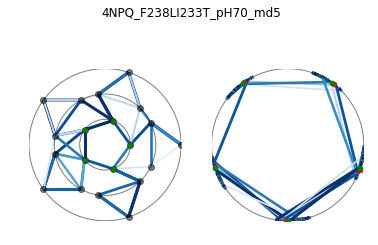


average shortest path length 22.759069101927448

radius: 33
diameter: 61
center: [1154.0, 1159.0]
density: 0.005198776758409786
 


In [56]:
for traj_note in traj_notes:
    create_hbond_network_all_rep(traj_note)

# Transform to Matlab

In [22]:
def transform_hbond_network_data(traj_notes):
    hbond_data_trans =[]
    for traj_note in traj_notes:
        hbond_data = pd.read_csv('/media/scottzhuang/data/MD/' + traj_note + '/hbond_analysis/hbond_contact_map_2.csv')
        hbond_data_all = pd.DataFrame(columns=['residue1','residue2','hbond'])
        for ind in trans_ind:
            hbond_data_all = hbond_data_all.append(pd.DataFrame(np.concatenate(([np.zeros([590]) + ind], [trans_ind],[np.zeros([590])]), axis=0).T,columns=['residue1','residue2','hbond']),ignore_index=True)
        for residue1,residue2 in hbond_data[['residue1','residue2']].values:
            hbond_data_all.loc[(hbond_data_all.residue1 == residue1) & (hbond_data_all.residue2 == residue2),'hbond'] = hbond_data[(hbond_data.residue1 == residue1) & (hbond_data.residue2 == residue2)]['interaction'].values 
        hbond_data_all.to_csv('/media/scottzhuang/data/MD/' + traj_note + '/hbond_analysis/hbond_contact_map_complete_2.csv')
        hbond_data_trans.append(hbond_data_all['hbond'].values.reshape([590,590]))
    hbond_data_mean = np.mean(hbond_data_trans,axis=0)
    np.savetxt('/media/scottzhuang/data/MD/' + traj_notes[0] + '/hbond_analysis/' + traj_notes[0][:-4] + '_hbond_network_data_transmembrane_mean.dat',hbond_data_mean)        

In [38]:
def transform_hbond_network_data_frame(traj_notes,location = '/media/scottzhuang/data/MD/', skip=10):
    hbond_data_trans =[]
    for traj_note in traj_notes:
        top_location = traj_note + '/' + traj_note + ".ca.pdb"
        traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
        traj = md.load(location + traj_location,top = location + top_location)
        n_frames = traj.n_frames
        for time in range(0,n_frames):  
            hbond_data = pd.read_csv('/media/scottzhuang/data/MD/' + traj_note + '/hbond_analysis/hbond_contact_map_2_frame_' + str(time) + '.csv')
            hbond_data_all = pd.DataFrame(columns=['residue1','residue2','hbond'])
            for ind in trans_ind:
                hbond_data_all = hbond_data_all.append(pd.DataFrame(np.concatenate(([np.zeros([590]) + ind], [trans_ind],[np.zeros([590])]), axis=0).T,columns=['residue1','residue2','hbond']),ignore_index=True)
            for residue1,residue2 in hbond_data[['residue1','residue2']].values:
                hbond_data_all.loc[(hbond_data_all.residue1 == residue1) & (hbond_data_all.residue2 == residue2),'hbond'] = hbond_data[(hbond_data.residue1 == residue1) & (hbond_data.residue2 == residue2)]['interaction'].values 
            hbond_data_all.to_csv('/media/scottzhuang/data/MD/' + traj_note + '/hbond_analysis/hbond_contact_map_complete_2_frame_' + str(time) + '.csv')
#            hbond_data_trans.append(hbond_data_all['hbond'].values.reshape([590,590]))
#       hbond_data_mean = np.mean(hbond_data_trans,axis=0)
#    np.savetxt('/media/scottzhuang/data/MD/' + traj_notes[0] + '/hbond_analysis/' + traj_notes[0][:-4] + '_hbond_network_data_transmembrane_mean.dat',hbond_data_mean)        

In [25]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(transform_hbond_network_data)(traj_notes) for traj_notes in traj_notess)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [39]:
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(transform_hbond_network_data_frame)(traj_notes) for traj_notes in traj_notess)

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

## Video making

In [40]:
def create_hbond_network(traj_note,time,location = '/media/scottzhuang/data/MD/', skip=10):
#    contact_map,note = gather_hbond_replicates(traj_notes)
    contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_2_frame_' + str(time) + '.csv')

    Hbond_network = nx.Graph()
    #Hbond_network.add_nodes_from(contact_map.residue1.values.astype(int))
    #Hbond_network.add_nodes_from(contact_map.residue2.values.astype(int))
    Hbond_network.add_nodes_from(np.arange(0,1555))
#    pos_spring = nx.spring_layout(Hbond_network)
    pos_circular = nx.circular_layout(Hbond_network)
    #print(Hbond_network.number_of_nodes())
    for index,row in contact_map.iterrows():
        if (row['hbond'] >= 1) & (row['residue1'] in pos_helix.keys()) & (row['residue2'] in pos_helix.keys()) :
            Hbond_network.add_edge(row['residue1'],row['residue2'])

    #print(Hbond_network.number_of_edges())
    #Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    resid233 = np.arange(0,5) * 311 + 233 - 5
    resid238 = np.arange(0,5) * 311 + 238 - 5 
    fig = plt.subplots(figsize=(20, 20))
    plt.subplot(221,aspect='equal')    
#    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
#    options = {'node_color': 'cyan','node_size': 10,'width': weights,'edge_color':weights,'font_size':1,'edge_cmap':plt.cm.Blues,'vmax':1,'vmin':0}
    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'blue','font_size':1,'alpha':0.3}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)

#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    plt.axis('off')

    plt.subplot(222,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')

    pathlengths = []
    
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)
    
    plt.subplot(223,aspect='equal')    
#    weights = [Hbond_network[u][v]['weight'] * 3 for u,v in Hbond_network.edges]
#    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'r','font_size':1,'alpha':0.3}
    nx.draw_networkx_edges(Hbond_network,pos_helix, with_labels=False,**options)
    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    
#    for edge in list(Hbond_network.edges):
#        if (edge[0] in helix_1_ind[1]) & (edge[1] in helix_2_ind[4]):
#            print(edge)
    plt.scatter(h1.T[0],h1.T[1],color='black',alpha=0.5)
    plt.scatter(h2.T[0],h2.T[1],color='black',alpha=0.5)
    plt.scatter(h3.T[0],h3.T[1],color='black',alpha=0.5)
    plt.scatter(h4.T[0],h4.T[1],color='black',alpha=0.5)

    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    circle2 = plt.Circle((0, 0), 2, color='black', fill=False,alpha=0.5)    
    circle3 = plt.Circle((0, 0), 3, color='black', fill=False,alpha=0.5) 
    plt.gca().add_patch(circle1)
    plt.gca().add_patch(circle2)
    plt.gca().add_patch(circle3)
    plt.xlim(-3,3)
    plt.ylim(-3,3)
    
    plt.axis('off')

    plt.subplot(224,aspect='equal')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    nx.draw_networkx_edges(Hbond_network,pos_circular, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')

    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_circular, node_size=20, nodelist=[residue],node_color='green')
    circle1 = plt.Circle((0, 0), 1, color='black', fill=False,alpha=0.5)    
    plt.gca().add_patch(circle1)
    plt.axis('off')
#    plt.savefig('hbond_dat/' + note + '_max_network.pdf')
    plt.suptitle(traj_note)
    plt.savefig('hbond_dat/' + traj_note + '_network_' + str(time) + '.png')
    plt.show()

#    for v in Hbond_network.nodes():
#        spl = dict(nx.single_source_shortest_path_length(Hbond_network, v))
#        for p in spl:
#            pathlengths.append(spl[p])
    
#    print('')
#    print("average shortest path length %s" % (sum(pathlengths) / len(pathlengths)))
#    print('')
#   print("length #paths")
#    dist = {}
#    for p in pathlengths:
#        if p in dist:
#            dist[p] += 1
#        else:
#            dist[p] = 1
#    verts = dist.keys()
    #for d in sorted(verts):
    #    print('%s %d' % (d, dist[d]))
    
#    print("radius: %d" % nx.radius(Hbond_network))
#    print("diameter: %d" % nx.diameter(Hbond_network))
#    #print("eccentricity: %s" % nx.eccentricity(Hbond_network))
#    print("center: %s" % nx.center(Hbond_network))
    #print("periphery: %s" % nx.periphery(Hbond_network))
#    print("density: %s" % nx.density(Hbond_network))
#    print(" ")



In [71]:
def create_hbond_network_2(traj_note,time,location = '/media/scottzhuang/data/MD/', skip=10):
#    contact_map,note = gather_hbond_replicates(traj_notes)
    contact_map = pd.read_csv(location + traj_note + '/hbond_analysis/hbond_contact_map_complete_2_frame_' + str(time) + '.csv')
    options = {'node_color': 'cyan','node_size': 10,'width': 3,'edge_color':'blue','font_size':1,'alpha':0.3}

    Hbond_network = nx.Graph()
    Hbond_network.add_nodes_from(contact_map[contact_map.hbond >=1].residue1.values.astype(int))
    Hbond_network.add_nodes_from(contact_map[contact_map.hbond >=1].residue2.values.astype(int))
#    Hbond_network.add_nodes_from(np.arange(0,1555))
    pos_spring = nx.spring_layout(Hbond_network)
#    pos_circular = nx.circular_layout(Hbond_network)
    #print(Hbond_network.number_of_nodes())
    for index,row in contact_map.iterrows():
        if (row['hbond'] >= 1) & (row['residue1'] in pos_helix.keys()) & (row['residue2'] in pos_helix.keys()) :
            Hbond_network.add_edge(row['residue1'],row['residue2'])
            
    Hbond_network = max(nx.connected_component_subgraphs(Hbond_network), key=len)

    #print(Hbond_network.number_of_edges())
    resid233 = np.arange(0,5) * 311 + 233 - 5
    resid238 = np.arange(0,5) * 311 + 238 - 5 
    fig = plt.subplots(figsize=(20, 20))
#    plt.xlim(-1.2,1.2)
#    plt.ylim(-1.2,1.2)
    nx.draw_networkx_edges(Hbond_network,pos_spring, with_labels=False,**options)
#    for edge in list(Hbond_network.edges):
#        if (not(edge[0] in np.asarray(helix_2_ind).flatten())) | (not(edge[1] in np.asarray(helix_2_ind).flatten())):
#            nx.draw_networkx_edges(Hbond_network,pos_circular,edge_color='purple')
    for residue in resid233:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='red')
    for residue in resid238:
        if residue in list(Hbond_network.nodes):
            nx.draw_networkx_nodes(Hbond_network, pos_helix, node_size=20, nodelist=[residue],node_color='green')
    plt.axis('off')

    pathlengths = []
    
    

#    plt.savefig('hbond_dat/' + note + '_max_network.pdf')
    plt.suptitle(traj_note)
    plt.savefig('hbond_dat/' + traj_note + '_network_' + str(time) + '_spring.png')
    plt.show()




In [72]:
def create_network_video(traj_note,location = '/media/scottzhuang/data/MD/',skip=10):
    top_location = traj_note + '/' + traj_note + ".ca.pdb"
    traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
    traj = md.load(location + traj_location,top = location + top_location)
    n_frames = traj.n_frames
    for time in range(0,n_frames):
        create_hbond_network(traj_note,time)
    image_folder = 'hbond_dat/'
    video_name = 'hbond_dat/videos/' + traj_note + '_hbond_network.mp4'
    writer = sio.FFmpegWriter(video_name)
    for time in range(0,n_frames):
        writer.writeFrame(sio.vread(os.path.join(image_folder, traj_note + '_network_' + str(time) + '.png')))
    writer.close()

In [74]:
def create_network_video_2(traj_note,location = '/media/scottzhuang/data/MD/',skip=10):
    top_location = traj_note + '/' + traj_note + ".ca.pdb"
    traj_location = traj_note + '/' + traj_note + ".skip" + str(skip) + ".ca.xtc"
    traj = md.load(location + traj_location,top = location + top_location)
    n_frames = traj.n_frames
    for time in range(0,n_frames):
        create_hbond_network_2(traj_note,time)
    image_folder = 'hbond_dat/'
    video_name = 'hbond_dat/videos/' + traj_note + '_hbond_network_spring.mp4'
    writer = sio.FFmpegWriter(video_name)
    for time in range(0,n_frames):
        writer.writeFrame(sio.vread(os.path.join(image_folder, traj_note + '_network_' + str(time) + '_spring.png')))
    writer.close()

In [ ]:
import skvideo.io as sio
import mdtraj as md
import os
from joblib import Parallel, delayed
import multiprocessing
num_cores = multiprocessing.cpu_count()
Parallel(n_jobs=num_cores)(delayed(create_network_video_2)(traj_note) for traj_note in traj_notes)